# Programa Ingenias+ Data Science

## Objetivo del notebook

El objetivo de este notebook es aplicar y comparar técnicas de APRENDIZAJE NO SUPERVISADO, tanto de clustering como de reducción de dimensionalidad, para identificar patrones y estructuras subyacentes en los datos.

Las columnas de características que se utilizarán en el notebook se detallan a continuación.


## Importación de archivos y librerías

In [1]:
# Imports de librerías y funciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, pairwise_distances, silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import time
import prince

from utils.codificaciones import *
from utils.funcions import *

In [2]:
# Importar el csv
friesgo_raw = pd.read_csv('datasets/friesgo_analisis.csv')

In [3]:
friesgo_raw.shape

(29224, 43)

## Preprocesado de datos

### Identificación de variables

In [4]:
# Copiar el dataframe
friesgo_cod = friesgo_raw.copy()

In [5]:
# Filas y columnas
friesgo_cod.shape

(29224, 43)

In [6]:
# Columnas presentes
friesgo_cod.columns

Index(['cant_tipos_tabaco', 'es_diabetico', 'cod_provincia',
       'ansiedad_depresion', 'fumado_100_cigarrillos',
       'af_intensa_veces_por_semana', 'tiempo_sentado_min_por_dia',
       'submuestra', 'colesterol_alto', 'ultima_medicion_glucemia',
       'condicion_fumador', 'dolor_malestar_general', 'salud_actual',
       'medido_colesterol', 'cobertura_salud', 'ranking_dieta',
       'capacidad_actividades_cotidianas', 'tamanio_aglomerado',
       'media_fv_diaria', 'nivel_educ', 'edad', 'diagnostico_cosanguineos',
       'tipo_bebida', 'presion_arterial_elevada',
       'af_moderada_veces_por_semana', 'mantiene_ha_alta',
       'nivel_actividad_fisica', 'condicion_actividad',
       'capacidad_cuidado_personal', 'peso_autoreportado_kg', 'freq_cons_alc',
       'imc_autoreportado', 'consumo_sal', 'caminata_veces_por_semana',
       'situacion_conyugal', 'sexo', 'barreras_actividad_fisica',
       'nivel_de_movilidad', 'imc_categorias_autoreportado',
       'altura_autoreportado_c

### Evaluación y procesamiento de nulos

In [7]:
calcular_nulos_y_porcentaje(friesgo_cod)

,Nulos,Porcentaje
cant_tipos_tabaco,0,0.0%
es_diabetico,0,0.0%
cod_provincia,0,0.0%
ansiedad_depresion,0,0.0%
fumado_100_cigarrillos,0,0.0%
af_intensa_veces_por_semana,0,0.0%
tiempo_sentado_min_por_dia,1110,3.8%
submuestra,0,0.0%
colesterol_alto,0,0.0%
ultima_medicion_glucemia,0,0.0%


In [8]:
# Remover columnas con > 50% de nulos
friesgo_cod.drop(columns=['tipo_bebida', 'tratamiento_medico_col'], inplace=True)

In [9]:
friesgo_cod.shape

(29224, 41)

In [10]:
variables_num = {
    'tiempo_sentado_min_por_dia', 'media_fv_diaria','edad', 'peso_autoreportado_kg','altura_autoreportado_cm','imc_autoreportado'
}

In [11]:
variables_cat = {
    'es_diabetico', 'cod_provincia',
       'ansiedad_depresion', 'fumado_100_cigarrillos', 'submuestra', 'colesterol_alto', 'ultima_medicion_glucemia',
       'condicion_fumador', 'dolor_malestar_general', 'salud_actual',
       'medido_colesterol', 'cobertura_salud', 'ranking_dieta',
       'capacidad_actividades_cotidianas', 'tamanio_aglomerado','nivel_educ','diagnostico_cosanguineos', 'presion_arterial_elevada',
       'af_moderada_veces_por_semana', 'mantiene_ha_alta',
       'nivel_actividad_fisica', 'condicion_actividad',
       'capacidad_cuidado_personal', 'freq_cons_alc', 'consumo_sal', 'caminata_veces_por_semana',
       'situacion_conyugal', 'sexo', 'barreras_actividad_fisica',
       'nivel_de_movilidad', 'imc_categorias_autoreportado', 'periodicidad_fumador', 'imc_categoria','cant_tipos_tabaco','af_intensa_veces_por_semana'
}

In [12]:
# Eliminar los nulos para no afectar el permutations importance
friesgo_cod = friesgo_cod.dropna()
friesgo_cod.shape

(12955, 41)

### Codificación de columnas

In [13]:
# Codificación de columnas categoricas
le = LabelEncoder()
for columnas in variables_cat:
    friesgo_cod[columnas] = le.fit_transform(friesgo_cod[columnas])

In [14]:
# Evaluar que no haya pérdida de filas y/o columnas por la codificación
friesgo_cod.shape

(12955, 41)

### Estandarizacion

In [15]:
# Defino columna objetivo y features (para evitar estandarizar los valores de las etiquetas)
col_obj = friesgo_cod['mantiene_ha_alta']
features = friesgo_cod.drop(columns=['mantiene_ha_alta'])

In [16]:
features.shape

(12955, 40)

In [17]:
# Estandarización de los datos 
scaler = StandardScaler()
features_stn = scaler.fit_transform(features)
features_stn = pd.DataFrame(features_stn, columns=features.columns) # colocar nuevamente los nombres de las columnas para ubicar la columna objetivo en permutations importance
features_stn.index = col_obj.index # coloco los indices anteriores para luego poder operar sobre ellos
features_stn.shape

(12955, 40)

### Eliminacion de outliers

In [18]:
# Creo un dataframe solo de variables numericaspara facilitar el graficado de outliers
friesgo_num = features_stn.filter(items=variables_num)

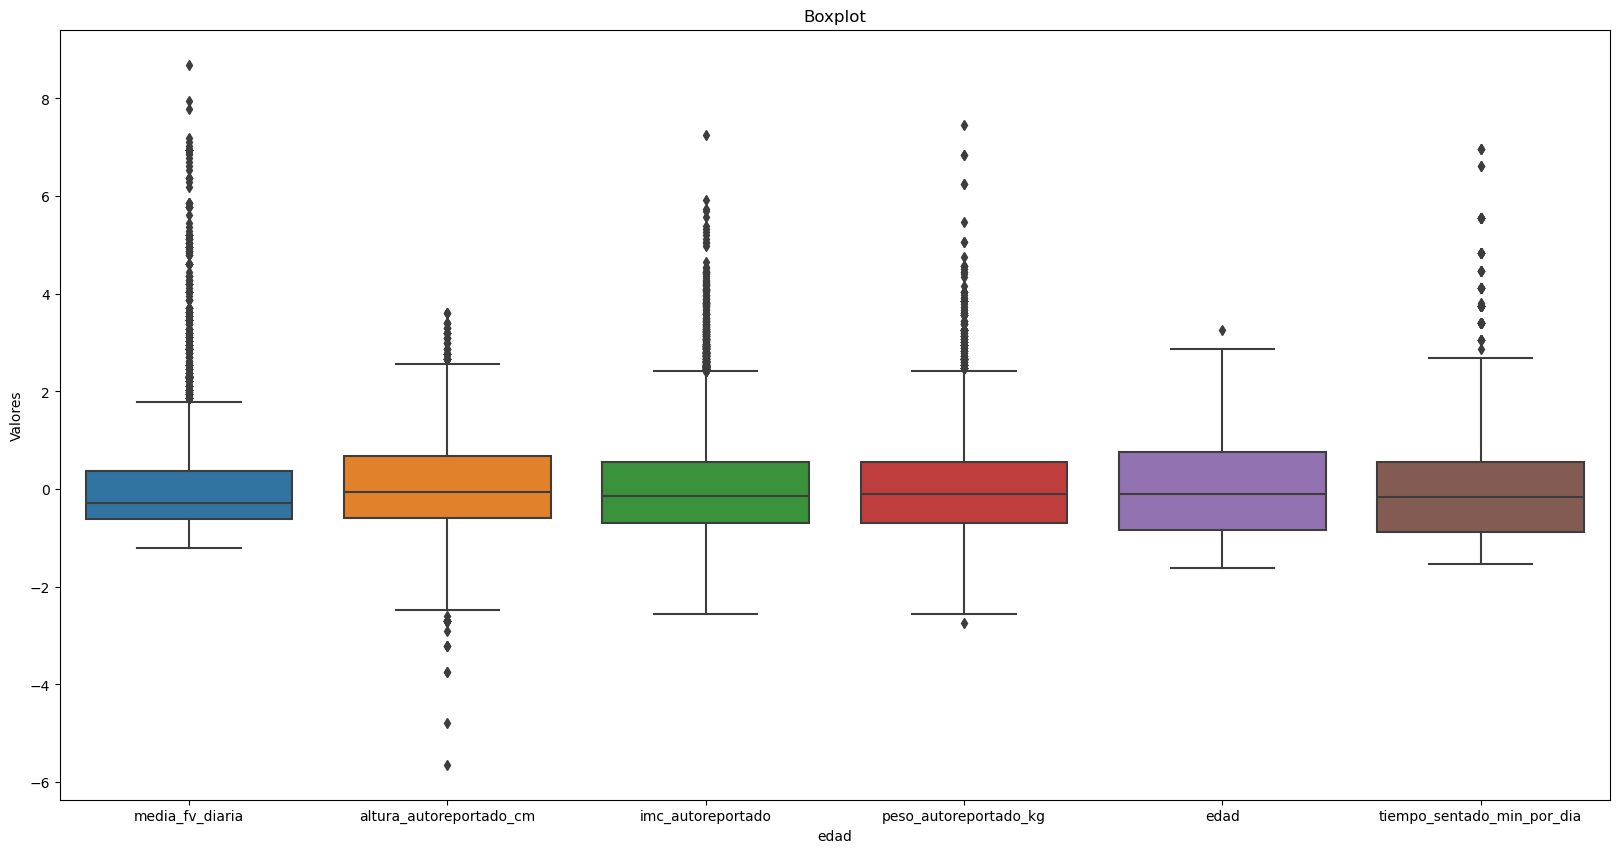

In [19]:
# analisis de los valores para deteccion de outliers en las columnas numericas a utlizar
plt.figure(figsize=(20, 10))
sns.boxplot(data=friesgo_num)
plt.title('Boxplot')
plt.xlabel('edad')
plt.ylabel('Valores')
plt.show()

In [20]:
# Calculamos la cantidad y porcentaje de ouliers
columnas_c_outliers = friesgo_num.columns
indices_outliers = identificar_outliers(features_stn,columnas_c_outliers)

In [21]:
print(f'El porcentaje de outliers es de {(len(indices_outliers)/len(features_stn))*100} %')
print(f'El total numerico de outliers es de : {len(indices_outliers)}')

El porcentaje de outliers es de 8.714781937475879 %
El total numerico de outliers es de : 1129


El porcentaje de outliers es relativamente bajo para cada columna y en total de 1129 registros como maximo con estos, por lo que seran eliminados a continuacion. Se eliminaran el mayor porcentaje posible, aunque el dataframe de salida de este preprocesado sera utilizado para realizar un permutations importance con un modelo de random forest, al cual no afectan  en sobremedida por los outliers, como si es el caso con los algoritmos de clustering, por lo que si las columnas resultantes de permutations importance tienen outliers seran eliminados al 100%.

In [22]:
# eliminar los outliers
col_obj = col_obj.drop(index=indices_outliers)
features_stn = features_stn.drop(indices_outliers,axis=0)

In [23]:
features_stn.shape

(11826, 40)

In [24]:
# verificar que los indices coincidan
iguales = col_obj.index == features_stn.index
np.unique(iguales)

array([ True])

Los registros iniciales fueron 12955 y al eliminar los outliers 11826, una diferencia de 1129 igual a la cantidad de outliers, por lo que se eliminaron el 100% en teoria, ahora observaremos los graficos.

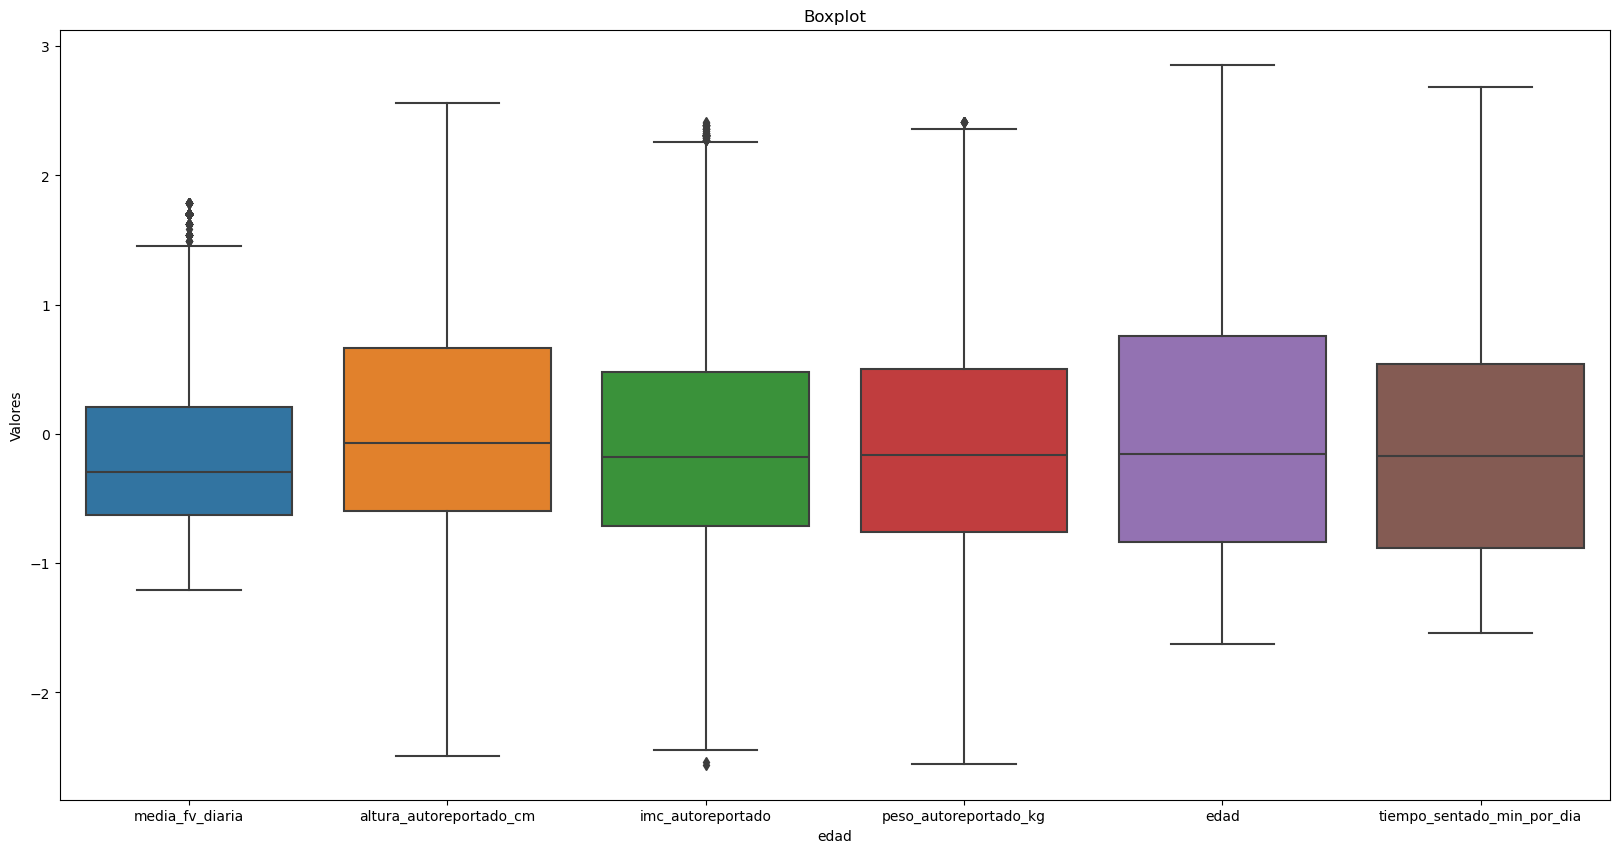

In [25]:
# Graficar
friesgo_num2 = features_stn.filter(items=variables_num)
# analisis de los valores para deteccion de outliers en las columnas numericas a utlizar
plt.figure(figsize=(20, 10))
sns.boxplot(data=friesgo_num2)
plt.title('Boxplot')
plt.xlabel('edad')
plt.ylabel('Valores')
plt.show()

In [26]:
# Calcular el porcentaje y numero de ouliers 
print(calcular_porcentaje_outliers(friesgo_num2.imc_autoreportado))
print(calcular_porcentaje_outliers(friesgo_num2.media_fv_diaria))
print(calcular_porcentaje_outliers(friesgo_num2.peso_autoreportado_kg))
print(calcular_porcentaje_outliers(friesgo_num2.tiempo_sentado_min_por_dia))
print(calcular_porcentaje_outliers(friesgo_num2.edad))
print(calcular_porcentaje_outliers(friesgo_num2.altura_autoreportado_cm))

(0.43125317097919835, 51)
(2.545239303230171, 301)
(0.06764755623203111, 8)
(0.0, 0)
(0.0, 0)
(0.0, 0)


Se eliminaron la mayoria de los outliers quedando solo alrededor de 400 (al eliminar valores, cambiaron los cuartiles, y nuevos datos son ahora considerados outliers)

## Reducción de dimensionalidad - PCA y FAMD

Debido a la gran cantidad de dimensiones del DataSet, una de las prácticas para realizar un clustering (ademas de todos los pasos hechos en el pre procesado, y la elección del algoritmo adecuando basado en las métricas) es reducir la dimensionalidad.
Se llevará a cabo en dos pasos:
Primero una selección de las columnas en base a un Permutation Importance;
Luego un algoritmo de reducción de dimensionalidad aplicado a ese dafaset de columnas importantes.

### Paso previo: Selección y procesamiento de columnas a utilizar en los modelos mediante Permutation Importance

#### Random Forest

Se aplica un algoritmo de clasificación Random Forest para evaluar la importancia de las características del dataset. Esto nos permite identificar las columnas más relevantes, lo que facilita la reducción de dimensionalidad al eliminar aquellas con menor relevancia.

In [27]:
# Separar los conjuntos para entrenamiento y testeo
y = col_obj
X = features_stn
X_train_pi, X_test_pi, y_train_pi, y_test_pi = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Entrenar el modelo para tener los parametros de accuracy de base
modelo = RandomForestClassifier(random_state=42,criterion= 'gini', n_estimators=200, max_depth=8)

# Ajustar el modelo
modelo.fit(X_train_pi, y_train_pi)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [29]:
# Calcular el acurracy base
y_pred_pi = modelo.predict(X_test_pi)
acc = accuracy_score(y_test_pi, y_pred_pi)
acc

0.7302705749718151

#### Permutation Importance

In [30]:
# Calcular Permutation Importance
perm = permutation_importance(modelo, X_test_pi, y_test_pi,random_state=1)

In [31]:
# Ordenar las características por importancia promedio
indices = np.argsort(perm.importances_mean)  # Orden ascendente
features = X_test_pi.columns[indices]
importances = perm.importances_mean[indices]
importances_std = perm.importances_std[indices]

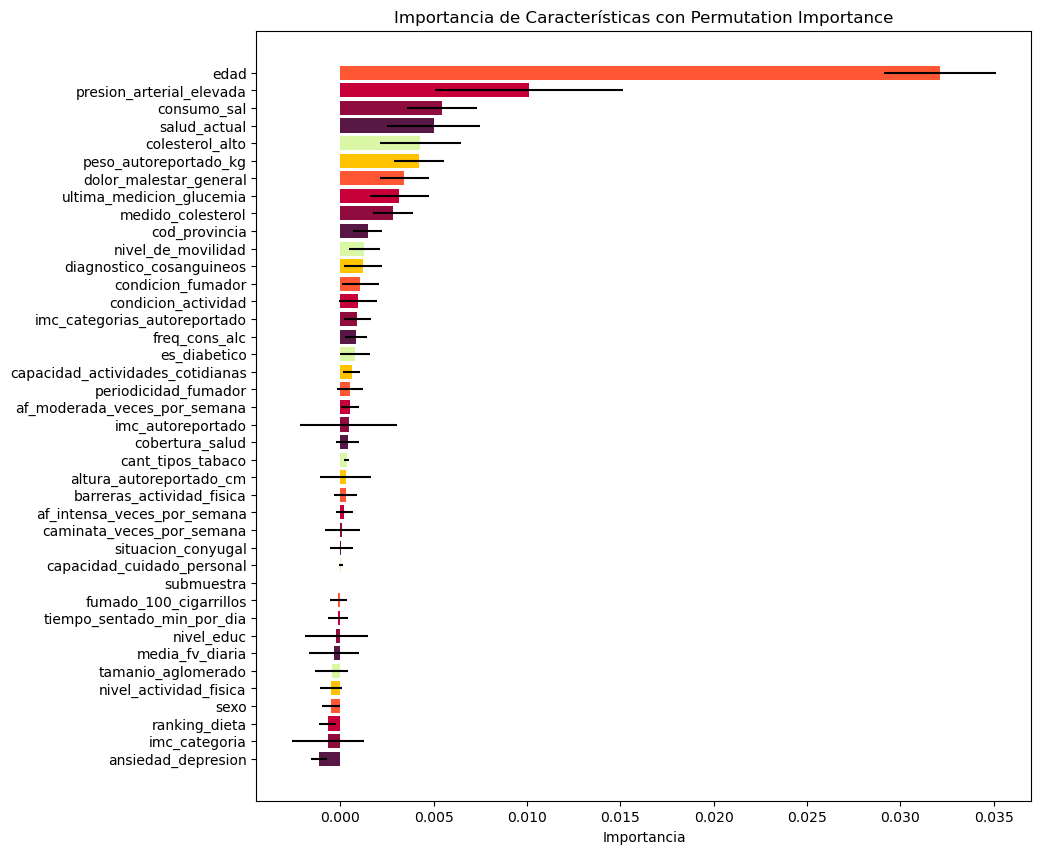

In [32]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 10))
plt.barh(features, importances, xerr=importances_std, align='center',color=['#581845','#900C3F','#C70039','#FF5733','#FFC300','#DAF7A6'])
plt.xlabel('Importancia')
plt.title('Importancia de Características con Permutation Importance')
plt.show()

#### Selección de columnas a utilizar

Se seleccionarán las 10 características principales, que son aquellas que más contribuyen a la precisión del modelo. 

In [33]:
# Se seleccionaran a partir del dataframe sin procesar para rescatar los valores eliminados por ser nulos en columnas que ya no estan presentes
friesgo_reducida = friesgo_raw.filter(items=['edad','presion_arterial_elevada','consumo_sal','salud_actual','colesterol_alto','peso_autoreportado_kg','dolor_malestar_general','ultima_medicion_glucemia','medido_colesterol','cod_provincia'
])

In [34]:
calcular_nulos_y_porcentaje(friesgo_reducida)

,Nulos,Porcentaje
edad,0,0.0%
presion_arterial_elevada,12997,44.47%
consumo_sal,0,0.0%
salud_actual,0,0.0%
colesterol_alto,0,0.0%
peso_autoreportado_kg,1011,3.46%
dolor_malestar_general,0,0.0%
ultima_medicion_glucemia,0,0.0%
medido_colesterol,0,0.0%
cod_provincia,0,0.0%


Este nuevo DataFrame servirá de entrada para los siguientes algoritmos no supervisados.

#### Creación y procesamiento del DataFrame compuesto por las columnas seleccionadas

In [35]:
auxm = friesgo_reducida.copy().dropna()
auxm.shape

(15599, 10)

In [36]:
auxm.head()

,edad,presion_arterial_elevada,consumo_sal,salud_actual,colesterol_alto,peso_autoreportado_kg,dolor_malestar_general,ultima_medicion_glucemia,medido_colesterol,cod_provincia
0,32,1.0,5,3,2,104.0,1,2,1,2
7,42,2.0,3,2,1,57.0,1,1,1,2
8,32,1.0,4,1,2,82.0,1,3,1,2
11,76,1.0,5,3,2,92.0,1,1,1,2
13,63,1.0,4,4,2,84.0,2,1,1,2


In [37]:
print(calcular_porcentaje_outliers(auxm.edad))
print(calcular_porcentaje_outliers(auxm.peso_autoreportado_kg))

(0.006410667350471184, 1)
(1.6988268478748638, 265)


In [38]:
auxm.dtypes

edad                          int64
presion_arterial_elevada    float64
consumo_sal                   int64
salud_actual                  int64
colesterol_alto               int64
peso_autoreportado_kg       float64
dolor_malestar_general        int64
ultima_medicion_glucemia      int64
medido_colesterol             int64
cod_provincia                 int64
dtype: object

In [39]:
auxm.columns

Index(['edad', 'presion_arterial_elevada', 'consumo_sal', 'salud_actual',
       'colesterol_alto', 'peso_autoreportado_kg', 'dolor_malestar_general',
       'ultima_medicion_glucemia', 'medido_colesterol', 'cod_provincia'],
      dtype='object')

In [40]:
# Codificación de columnas categoricas
le = LabelEncoder()
categoricas = ['presion_arterial_elevada', 'consumo_sal', 'salud_actual','colesterol_alto', 'dolor_malestar_general','ultima_medicion_glucemia', 'medido_colesterol', 'cod_provincia']
for columnas in categoricas:
    auxm[columnas] = le.fit_transform(auxm[columnas])

In [41]:
auxm.head()

,edad,presion_arterial_elevada,consumo_sal,salud_actual,colesterol_alto,peso_autoreportado_kg,dolor_malestar_general,ultima_medicion_glucemia,medido_colesterol,cod_provincia
0,32,0,3,2,1,104.0,0,1,0,0
7,42,1,1,1,0,57.0,0,0,0,0
8,32,0,2,0,1,82.0,0,2,0,0
11,76,0,3,2,1,92.0,0,0,0,0
13,63,0,2,3,1,84.0,1,0,0,0


In [42]:
# Estandarizar columnas numericas
numericas = ['edad','peso_autoreportado_kg']
auxm['edad'] = scaler.fit_transform(auxm[['edad']]).flatten()
auxm['peso_autoreportado_kg'] = scaler.fit_transform(auxm[['peso_autoreportado_kg']]).flatten()

In [43]:
auxm.head()

,edad,presion_arterial_elevada,consumo_sal,salud_actual,colesterol_alto,peso_autoreportado_kg,dolor_malestar_general,ultima_medicion_glucemia,medido_colesterol,cod_provincia
0,-0.790248,0,3,2,1,1.712710,0,1,0,0
7,-0.230687,1,1,1,0,-1.103666,0,0,0,0
8,-0.790248,0,2,0,1,0.394406,0,2,0,0
11,1.671823,0,3,2,1,0.993636,0,0,0,0
13,0.944392,0,2,3,1,0.514252,1,0,0,0


### PCA

#### Estandarizar datos

PCA es sensible a la escala de las columnas. La estandarización asegura que cada característica contribuya igualmente al análisis.

In [44]:
# Estandarización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(auxm)
scaled_data

array([[-0.79024847, -1.22795676,  1.39266459, ..., -0.08137297,
        -0.66339768, -1.3281036 ],
       [-0.23068688,  0.81436092, -0.93988224, ..., -0.84191036,
        -0.66339768, -1.3281036 ],
       [-0.79024847, -1.22795676,  0.22639117, ...,  0.67916443,
        -0.66339768, -1.3281036 ],
       ...,
       [ 0.8884363 ,  0.81436092,  0.22639117, ..., -0.08137297,
        -0.66339768,  1.89427434],
       [ 1.55991021, -1.22795676,  0.22639117, ..., -0.84191036,
        -0.66339768,  1.89427434],
       [-0.3425992 , -1.22795676,  1.39266459, ..., -0.84191036,
        -0.66339768,  1.89427434]])

#### Evaluar el número óptimo de componentes para PCA

Para conservar el 80% de información al aplicar PCA, hay que seleccionar el número de componentes principales que en conjunto expliquen al menos el 95% de la varianza total.

In [45]:
pca = PCA(n_components = 0.80)
pca_data = pca.fit_transform(scaled_data)
n_components = pca.n_components_

# Ver el número de componentes seleccionados automáticamente
print(f"Número de componentes seleccionados: {n_components}")

Número de componentes seleccionados: 7


#### Aplicar PCA 

Se aplica PCA con el número de componentes principales calculado con anterioridad.

In [46]:
# Aplicar PCA con el número óptimo de componentes
pca_opt = PCA(n_components = n_components)
pca_opt_data = pca_opt.fit_transform(scaled_data)

# Convertir a DataFrame para facilitar el manejo
pca_df = pd.DataFrame(data = pca_opt_data, columns = [f'PC{i+1}' for i in range(n_components)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.629346,0.185646,2.288828,-0.396797,-0.451186,1.071706,1.103503
1,-0.178164,-2.344534,-0.824865,-1.115680,0.981511,0.797168,-0.809020
2,0.745412,-0.926844,2.125307,-0.883871,-0.097137,0.102606,-0.089116
3,-1.939684,-0.239334,1.963438,-0.890369,-1.172631,-0.068190,0.465731
4,-2.097166,0.971080,0.342604,-1.565634,-0.278024,-0.496128,0.785299
...,...,...,...,...,...,...,...
15594,-1.392193,-0.135373,-1.038395,1.444509,-0.572221,-1.381308,-0.073645
15595,0.777949,-0.689554,0.153848,2.245567,0.412521,-0.240742,0.795670
15596,-1.212397,-0.368224,-0.397063,2.199480,0.755793,0.816464,-0.699200
15597,-2.161850,-0.431731,0.122281,1.698657,0.180230,-0.619133,-1.949142


#### Visualizar la varianza explicada 

Permite ver cómo cada componente principal contribuye a la varianza total y cómo se acumula la varianza explicada.

In [47]:
# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Imprimir la varianza explicada por cada componente principal
print('Varianza explicada')
for i in range(n_components):
    print('PC{}: {}'.format(i+1, pca.explained_variance_ratio_[i]))

Varianza explicada
PC1: 0.2417626027904551
PC2: 0.13237475735731197
PC3: 0.11393683287049838
PC4: 0.10216067470183089
PC5: 0.09632744060140556
PC6: 0.07877567987501867
PC7: 0.07476928609307708


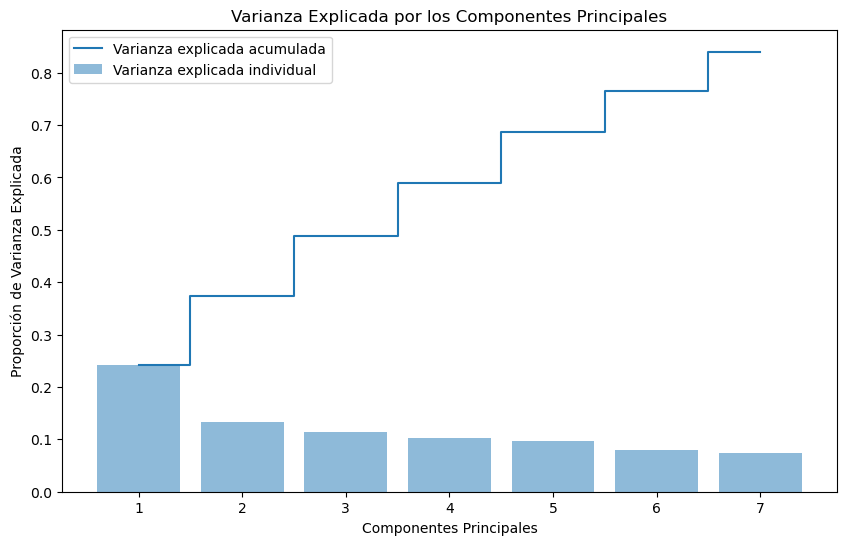

In [48]:
# Visualización de la varianza explicada por cada componente
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(1, len(np.cumsum(explained_variance)) + 1), np.cumsum(explained_variance), where='mid', label='Varianza explicada acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Varianza Explicada por los Componentes Principales')
plt.legend(loc='best')
plt.show()

In [332]:
def plot_3d_scatter(ax, data, view_angle=(90, 30)):
    """
    Función para crear un scatterplot 3D dado un subplot y datos.
    
    Parameters:
    - ax: El objeto Axes3D donde se dibujará el scatterplot.
    - data: DataFrame que contiene las columnas 'PC1', 'PC2', 'PC3', y 'PC4'.
    - view_angle: Tuple que contiene los ángulos de elevación y azimut (elev, azim).
    """
    '''
    group1 = data[data['PC4'] == 0]
    group2 = data[data['PC4'] == 1]
    group3 = data[data['PC4'] == 2]
    
    # Graficar los tres grupos con diferentes colores y marcadores
   
    ax.scatter(group1['PC1'], group1['PC2'], group1['PC3'], color='r', label='Cluster 0', marker='o', alpha=0.7)
    ax.scatter(group2['PC1'], group2['PC2'], group2['PC3'], color='g', label='Cluster 1', marker='^', alpha=0.7)
    ax.scatter(group3['PC1'], group3['PC2'], group3['PC3'], color='b', label='Cluster 2', marker='s', alpha=0.7)
'''
    ax.scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['PC4'],
                     cmap='inferno', marker='o', alpha=0.7)
    
    # Etiquetas de los ejes
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    
    # Configurar la vista
    ax.view_init(elev=view_angle[0], azim=view_angle[1])
    
    # Título del gráfico con el ángulo actual
    ax.set_title(f'Vista: Elev={view_angle[0]}, Azim={view_angle[1]}')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


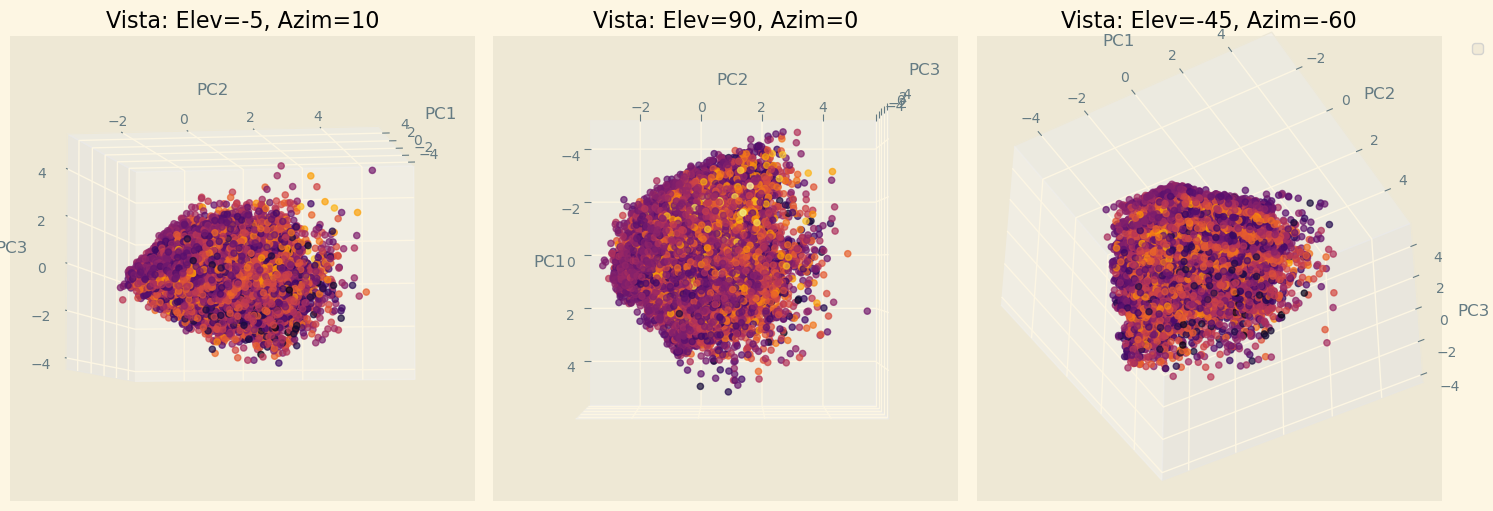

In [334]:
# Configurar la figura con tres subplots
fig = plt.figure(figsize=(15, 5))

# Definir los ángulos para cada vista
angles = [(-5, 10), (90, 0), (-45, -60)]

# Crear subplots con diferentes vistas usando la función
for i, angle in enumerate(angles):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    plot_3d_scatter(ax, pca_df, view_angle=angle)

# Añadir una leyenda fuera de los subplots
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Mostrar el gráfico
plt.tight_layout()
plt.show()


En el gráfico anterior podemos observar información 4 componentes en total, las 3 primeras en los ejes coordenados, y una 4 en el gradiente de colores.
Se hizo un intento de utilizar el dataframe obtenido para alimentar al los algoritmos de clustering, pero los resultados no fueron buenos. A pesar de tener 7 features en lugar de 10, como sería usando las columnas de interés seleccionadas, las métricas eran muy malas.

### FAMD

FAMD (Factor Analysis of Mixed Data) de la librería Prince es un método de análisis factorial diseñado para manejar conjuntos de datos que contienen variables tanto numéricas como categóricas.

Se aplica el siguiente método de Reducción de Dimensionalidad esperando que de mejores resultados que PCA al trabajar con variables categóricas

In [51]:
#A partir del dataframe de las 10 columnas seleccionadas
subset_famd = friesgo_reducida.copy().dropna()

In [52]:
subset_famd.dtypes

edad                          int64
presion_arterial_elevada    float64
consumo_sal                   int64
salud_actual                  int64
colesterol_alto               int64
peso_autoreportado_kg       float64
dolor_malestar_general        int64
ultima_medicion_glucemia      int64
medido_colesterol             int64
cod_provincia                 int64
dtype: object

In [53]:
#codificación variables categóricas
le = LabelEncoder()
categoricas = ['presion_arterial_elevada', 'consumo_sal', 'salud_actual','colesterol_alto', 'dolor_malestar_general','ultima_medicion_glucemia', 'medido_colesterol', 'cod_provincia']
for columnas in categoricas:
    auxm[columnas] = le.fit_transform(auxm[columnas])

In [54]:
subset_famd[categoricas] = subset_famd[categoricas].astype('category')


In [55]:
#debe cumplir los requisitos del método para identificar las variables como contínuas (float) o categóricas (category o bool) 
subset_famd.dtypes

edad                           int64
presion_arterial_elevada    category
consumo_sal                 category
salud_actual                category
colesterol_alto             category
peso_autoreportado_kg        float64
dolor_malestar_general      category
ultima_medicion_glucemia    category
medido_colesterol           category
cod_provincia               category
dtype: object

In [56]:
subset_famd['peso_autoreportado_kg'] = subset_famd['peso_autoreportado_kg'].astype('float')
subset_famd['edad']=subset_famd['edad'].astype('float')


In [57]:
subset_famd.head()

,edad,presion_arterial_elevada,consumo_sal,salud_actual,colesterol_alto,peso_autoreportado_kg,dolor_malestar_general,ultima_medicion_glucemia,medido_colesterol,cod_provincia
0,32.0,1.0,5,3,2,104.0,1,2,1,2
7,42.0,2.0,3,2,1,57.0,1,1,1,2
8,32.0,1.0,4,1,2,82.0,1,3,1,2
11,76.0,1.0,5,3,2,92.0,1,1,1,2
13,63.0,1.0,4,4,2,84.0,2,1,1,2


In [58]:
#se estandarizan las variables numéricas para reducir variabilidad
subset_famd['edad'] = scaler.fit_transform(subset_famd[['edad']]).flatten()
subset_famd['peso_autoreportado_kg'] = scaler.fit_transform(subset_famd[['peso_autoreportado_kg']]).flatten()

In [59]:
subset_famd.dtypes

edad                         float64
presion_arterial_elevada    category
consumo_sal                 category
salud_actual                category
colesterol_alto             category
peso_autoreportado_kg        float64
dolor_malestar_general      category
ultima_medicion_glucemia    category
medido_colesterol           category
cod_provincia               category
dtype: object

In [62]:
#otro requisito a cumpliar para aplicar el método: no debe haber valores null o  nan
calcular_nulos_y_porcentaje(subset_famd)

,Nulos,Porcentaje
edad,0,0.0%
presion_arterial_elevada,0,0.0%
consumo_sal,0,0.0%
salud_actual,0,0.0%
colesterol_alto,0,0.0%
peso_autoreportado_kg,0,0.0%
dolor_malestar_general,0,0.0%
ultima_medicion_glucemia,0,0.0%
medido_colesterol,0,0.0%
cod_provincia,0,0.0%


In [63]:
#se aplica el método, solicitando 7 componentes, imitando lo que solicitaba PCA para asegurar 80% de la varianza
famd = prince.FAMD(n_components=7, engine='sklearn')
famd.fit(subset_famd)

c:\Users\Lenovo\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.40605709482056684, -0.7955256632180482, -0.3710810352040657, -0.5225843751300573, -0.40763279765520966, -0.38063247643973935, -0.3779281261939868, -0.4687831873842664, -0.3809691704254658, -0.40161223902896065, -0.29829526114998883, -0.31785549773981553, -0.36127716127039267, -0.42668835553994394, -0.2970030012348082, -0.4503704197312566, -0.41511292244480347, -0.3113346918336026, -0.34157597365531367, -0.2842083894186393, -0.5166625479688073, -0.30760599814203016, -0.37758872053396825, -0.2166242945873086, -0.9492541297156571, -1.7434683911385995, -0.2433815241926834, -0.6326784881465631, -0.8562265577520266, -1.4523656512734795, -0.8701885010948239, -1.709605644125809, -0.9699636799154652, -0.36934942969771434, -1.6535651902247366, -1.102363870487108, -0.2247577778892489, -1.2629228150592697, -1.55081461277703, -0.6160450528556285, -0.98204928

FAMD(n_components=7)

In [64]:
#métricas de resultados
eigenvalues = famd.eigenvalues_
print(eigenvalues)


[8.65304972 5.69537307 5.36624538 4.6437157  4.35665037 4.31772325
 4.20728567]


In [65]:
total_variance = eigenvalues.sum()
total_variance

37.24004316120889

In [66]:
explained_variance_ratio = eigenvalues / total_variance
print(explained_variance_ratio)

[0.23235875 0.1529368  0.1440988  0.12469684 0.11698833 0.11594302
 0.11297746]


In [67]:
#Varianza total explicada
total_variance_explained = explained_variance_ratio.sum()
print(total_variance_explained)

1.0


In [68]:
#Por el buen resultado, se decide probar con menor cantidad de componentes, quedando en el número óptimo para la visaulización gráfica: 3 componentes
famd2 = prince.FAMD(n_components=3, engine='sklearn')
famd2.fit(subset_famd)

c:\Users\Lenovo\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.40605709482056684, -0.7955256632180482, -0.3710810352040657, -0.5225843751300573, -0.40763279765520966, -0.38063247643973935, -0.3779281261939868, -0.4687831873842664, -0.3809691704254658, -0.40161223902896065, -0.29829526114998883, -0.31785549773981553, -0.36127716127039267, -0.42668835553994394, -0.2970030012348082, -0.4503704197312566, -0.41511292244480347, -0.3113346918336026, -0.34157597365531367, -0.2842083894186393, -0.5166625479688073, -0.30760599814203016, -0.37758872053396825, -0.2166242945873086, -0.9492541297156571, -1.7434683911385995, -0.2433815241926834, -0.6326784881465631, -0.8562265577520266, -1.4523656512734795, -0.8701885010948239, -1.709605644125809, -0.9699636799154652, -0.36934942969771434, -1.6535651902247366, -1.102363870487108, -0.2247577778892489, -1.2629228150592697, -1.55081461277703, -0.6160450528556285, -0.98204928

FAMD(n_components=3)

In [69]:
#métricas
eigenvalues2 = famd2.eigenvalues_
total_variance2 = eigenvalues2.sum()
explained_variance_ratio2 = eigenvalues2 / total_variance2
total_variance_explained2 = explained_variance_ratio2.sum()
print(explained_variance_ratio2)
print(total_variance_explained2)

[0.45175333 0.28508736 0.26315931]
1.0


In [70]:
#se extraen las coordenadas obtenidas respecto a las 3 Componentes Principales calculadas
row_coord_FAMD = famd2.row_coordinates(subset_famd)

c:\Users\Lenovo\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.40605709482056684, -0.7955256632180482, -0.3710810352040657, -0.5225843751300573, -0.40763279765520966, -0.38063247643973935, -0.3779281261939868, -0.4687831873842664, -0.3809691704254658, -0.40161223902896065, -0.29829526114998883, -0.31785549773981553, -0.36127716127039267, -0.42668835553994394, -0.2970030012348082, -0.4503704197312566, -0.41511292244480347, -0.3113346918336026, -0.34157597365531367, -0.2842083894186393, -0.5166625479688073, -0.30760599814203016, -0.37758872053396825, -0.2166242945873086, -0.9492541297156571, -1.7434683911385995, -0.2433815241926834, -0.6326784881465631, -0.8562265577520266, -1.4523656512734795, -0.8701885010948239, -1.709605644125809, -0.9699636799154652, -0.36934942969771434, -1.6535651902247366, -1.102363870487108, -0.2247577778892489, -1.2629228150592697, -1.55081461277703, -0.6160450528556285, -0.98204928

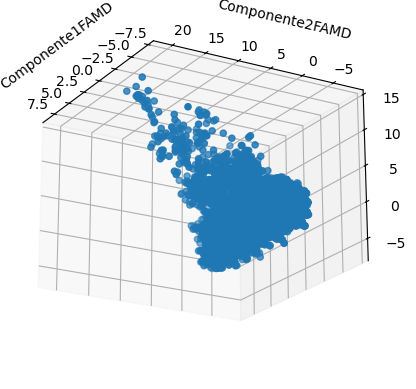

In [71]:
#Gráfico de los datos en el espacio dado por los nuevos ejes
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(row_coord_FAMD.iloc[:, 0], row_coord_FAMD.iloc[:, 1], row_coord_FAMD.iloc[:, 2])

ax.set_xlabel('Componente1FAMD')
ax.set_ylabel('Componente2FAMD')
ax.set_zlabel('Componente3FAMD')
ax.view_init(elev=-20, azim=150)

plt.show()

In [72]:
#Se crea un dataframe conteniendo las coordenadas de las filas en las componentes obtenidas mediante FAMD
component_df = pd.DataFrame(row_coord_FAMD.values, columns=[f"Component {i+1}" for i in range(row_coord_FAMD.shape[1])], index=subset_famd.index)

print(component_df)

       Component 1  Component 2  Component 3
0         2.071236     1.071823    -3.043333
7         2.168555     2.750455    -5.210474
8         0.183330     1.576956    -3.751151
11        3.124489     1.255445    -2.165228
13        4.123491    -0.150895    -1.079932
...            ...          ...          ...
29216     2.109646     2.363097     0.145466
29217    -0.170509     3.418448    -2.613855
29220     2.296853     2.681981    -1.086059
29221     3.925746     2.669813     0.568157
29223     3.423765     2.438393     1.359119

[15599 rows x 3 columns]


## Clustering - modelos Kmeans y DBSCAN

### Modelo 1: K-Means

Para la aplicacion de este modelo se seguiran los siguientes pasos:

+ 1 : Calculo de la cantidad optima de clusters mediante la tecnica visual del "codo"
+ 2 : Calculo de la cantidad optima de cluster mediante metodo Silhouette Score
+ 3 : Aplicacion del modelo 
+ 4 : Graficado de clusters 2d,3d y centroides
+ 5 : Identificacion de clusters



#### Paso 1

In [207]:
# Test codo pca_df reducida
inertias = []
k_range = range(1,15) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=500, random_state=42)
    kmeans.fit(auxm) # aplicar kmeans a mi dataframe
    inertias.append(kmeans.inertia_)

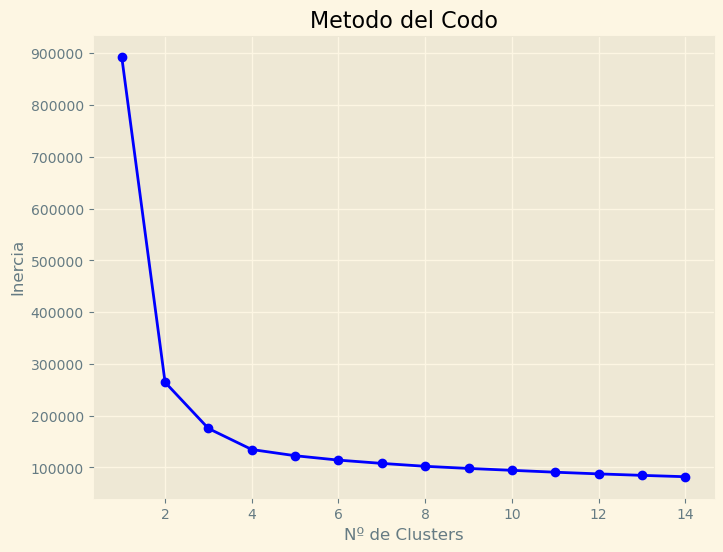

In [208]:
# Graficar el metodo del codo
plt.figure(figsize=(8, 6))
plt.style.use('Solarize_Light2')
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Nº de Clusters')
plt.ylabel('Inercia')
plt.title('Metodo del Codo')
plt.show()

Del grafico puede observarse que la inercia comienza a disminuir de manera menos pronunciada alrededor de los 2 a 4 clusters, aunque el codo es pronunciado, se utilizaran esos valores de cluster (2,3,4) y se evaluaran con Silhouette Score para determinar el optimo.

#### Paso 2

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 2, el Silhouette Score promedio es: 0.56


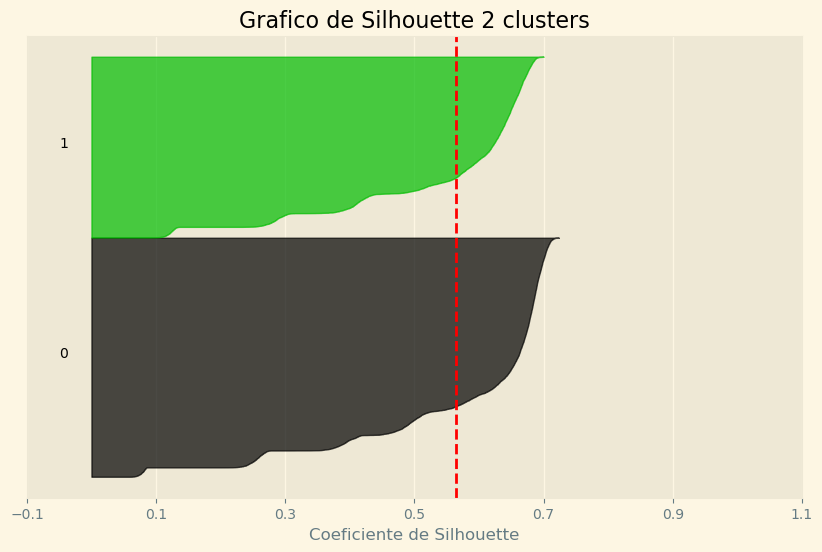

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 3, el Silhouette Score promedio es: 0.43


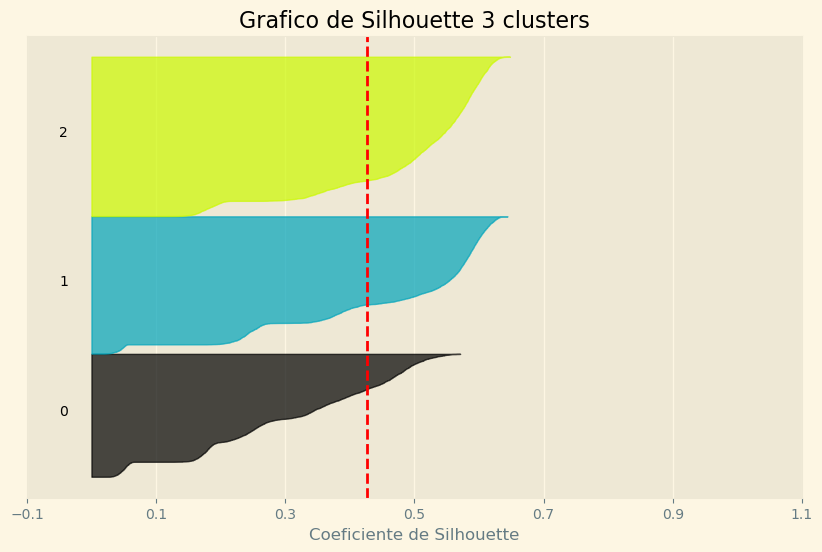

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 4, el Silhouette Score promedio es: 0.36


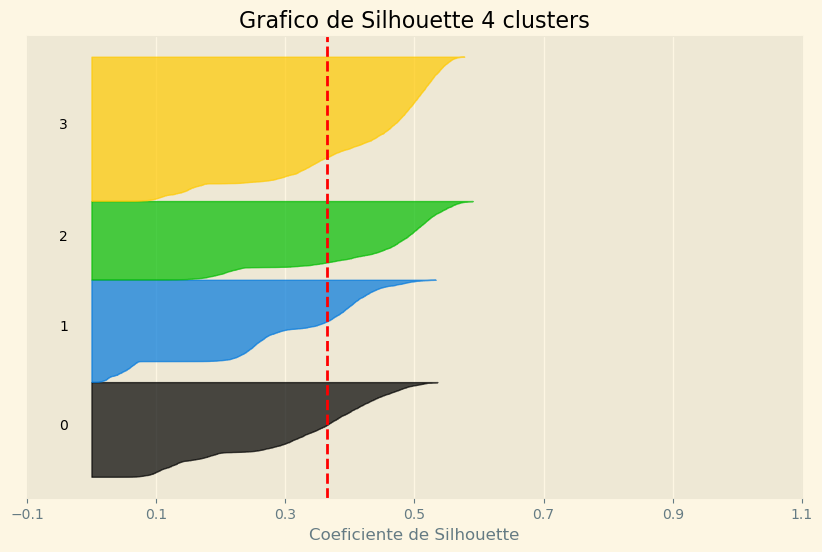

In [209]:
range_n_clusters = [2,3,4]  # Numeros de clusters a probar

for n_clusters in range_n_clusters:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Aplicar K-means
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(auxm)
    
    # Calcular el Silhouette Score promedio
    silhouette_avg = silhouette_score(auxm, cluster_labels)
    print(f"Para n_clusters = {n_clusters}, el Silhouette Score promedio es: {silhouette_avg:.2f}")
    
    # Calcular los Silhouette Scores para cada punto
    sample_silhouette_values = silhouette_samples(auxm, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10  
    
    ax.set_title(f"Grafico de Silhouette {n_clusters} clusters")
    ax.set_xlabel("Coeficiente de Silhouette")
    ax.set_ylabel("")
    
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  
    ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
    
    plt.show()

Los graficos de Silhouette Score muestran una cohesion maxima del 70% aprox y 56% promedio para un numero de clusters igual a 2, al aumentar los n clusters estos parametros disminuyen; por lo que se concluye que los grupos se diferencian mejor cuando se agrupan en 2, por lo que se usara este parametro.

#### Paso 3

In [210]:
# Aplicar modelo
cluster =  KMeans(n_clusters=2, init='k-means++', random_state=42)
cluster.fit(auxm)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [211]:
# Agregar las etiquetas generadas por el algoritmo al dataframe
salida_kmeans = auxm.copy()
salida_kmeans['cluster_label'] = cluster.labels_
salida_kmeans.head(5)

,edad,presion_arterial_elevada,consumo_sal,salud_actual,colesterol_alto,peso_autoreportado_kg,dolor_malestar_general,ultima_medicion_glucemia,medido_colesterol,cod_provincia,cluster_label
0,-0.790248,0,3,2,1,1.712710,0,1,0,0,0
7,-0.230687,1,1,1,0,-1.103666,0,0,0,0,0
8,-0.790248,0,2,0,1,0.394406,0,2,0,0,0
11,1.671823,0,3,2,1,0.993636,0,0,0,0,0
13,0.944392,0,2,3,1,0.514252,1,0,0,0,0


#### Paso 4

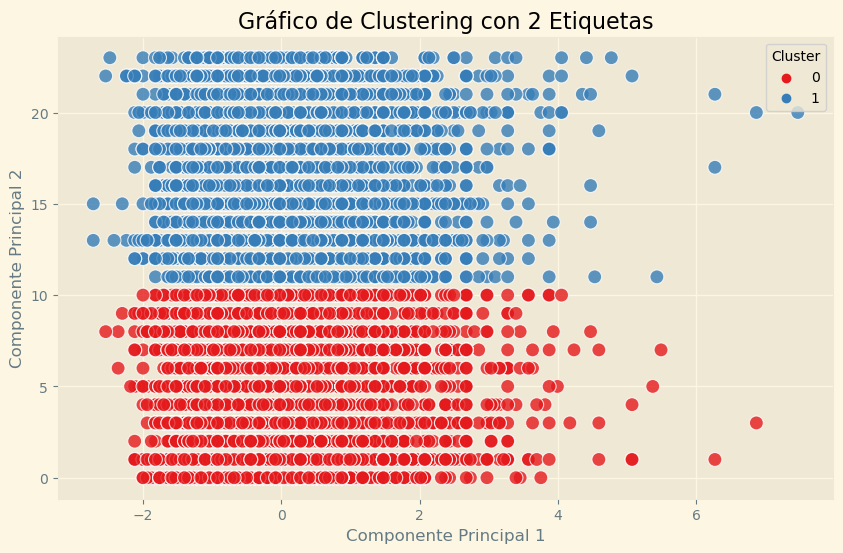

In [212]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=salida_kmeans.peso_autoreportado_kg, y=salida_kmeans.cod_provincia, hue=salida_kmeans.cluster_label, data=salida_kmeans, palette='Set1', s=100, alpha=0.8)
plt.title('Gráfico de Clustering con 2 Etiquetas')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

In [213]:
# centroides
centroids = cluster.cluster_centers_
centroids_df = pd.DataFrame(centroids)
print(centroids_df)

          0         1         2         3         4         5         6  \
0  0.042762  0.592547  1.790813  1.793628  0.793402 -0.019657  0.284846   
1 -0.056546  0.612774  1.825815  1.886110  0.784428  0.025992  0.327974   

          7         8          9  
0  1.087593  0.327066   3.957892  
1  1.132649  0.331696  16.780706  


In [214]:
def plot_3d_scatter(ax, data, view_angle=(90, 30)):
    # Extraer los centroides
   # centroids = centroid_df.iloc[:, :3].values  # Convertir a Numpy array
    centroids = centroids_df.iloc[:, [1, 5, 7]].values
    # Graficar los centroides
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=100, c='red', marker='X')
    
    # Graficar los puntos de datos
    ax.scatter(
        data['cod_provincia'], 
        data['peso_autoreportado_kg'], 
        data['presion_arterial_elevada'], 
        c=data['cluster_label'], 
        cmap='tab20', 
        marker='o', 
        alpha=0.7
    )
    
    # Etiquetas de los ejes
    ax.set_xlabel('cod_prov')
    ax.set_ylabel('peso_autoreportado')
    ax.set_zlabel('presion_arterial_elevada')
    
    # Configurar la vista
    ax.view_init(elev=view_angle[0], azim=view_angle[1])
    
    # Título del gráfico con el ángulo actual
    ax.set_title(f'Vista: Elev={view_angle[0]}, Azim={view_angle[1]}')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


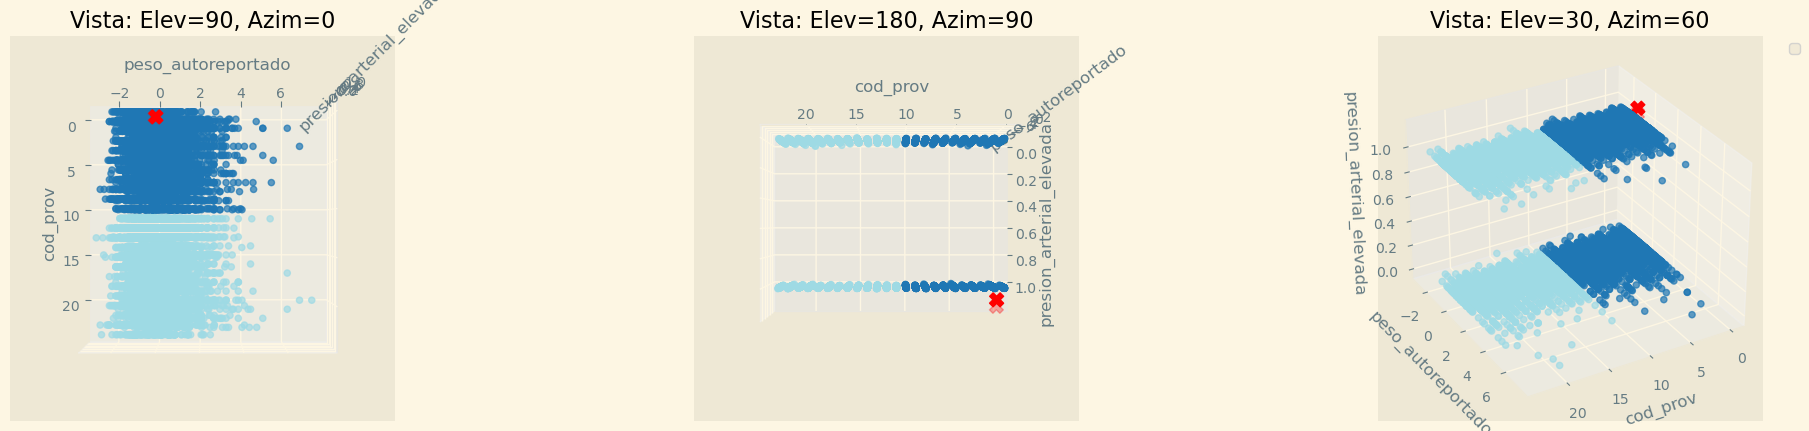

In [215]:
# Ejemplo de uso
fig = plt.figure(figsize=(25, 5))
angles = [(90, 0), (180, 90), (30, 60)]

for i, angle in enumerate(angles):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    plot_3d_scatter(ax, salida_kmeans, view_angle=angle)

# Añadir una leyenda fuera de los subplots
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

#### Paso 5

In [216]:
# Analisis de importancia de variable/columna
cluster_means = salida_kmeans.groupby('cluster_label').mean()
print(cluster_means)


                   edad  presion_arterial_elevada  consumo_sal  salud_actual  \
cluster_label                                                                  
0              0.042762                  0.592547     1.790813      1.793628   
1             -0.056546                  0.612774     1.825815      1.886110   

               colesterol_alto  peso_autoreportado_kg  dolor_malestar_general  \
cluster_label                                                                   
0                     0.793402              -0.019657                0.284846   
1                     0.784428               0.025992                0.327974   

               ultima_medicion_glucemia  medido_colesterol  cod_provincia  
cluster_label                                                              
0                              1.087593           0.327066       3.957892  
1                              1.132649           0.331696      16.780706  


### Modelo 2: DBSCAN

#### Análisis Exploratorio
A partir del resultado del preprocesamiento utilizando FAMD se tratará de determinar los valores óptimos de `eps` y `min_samples` para el algoritmo DBSCAN.

##### Aplicar DBSCAN a valores exploratorios
Se evalúan valores de eps en el rango de 0.7 y 1.3, a un paso de 0.1
Se evalúan valores de min_samples en el rango de 4 y 14, a un paso de 1

In [ ]:
eps_values = np.round(np.arange(0.7, 1.3, 0.1), 1)
min_samples = np.round(np.arange(4, 14, 1), 1)

dbscan_params = list(product(eps_values, min_samples))

Se aplica el algoritmo DBSCAN a cada combinación definida con anterioridad para obtener clusters, puntos de ruido, porcentaje de ruido y silhouette score.

In [ ]:
# Inicializar una lista de diccionarios para almacenar los resultados
results = []
total_points = len(component_df)

# Iterar sobre las combinaciones de parámetros de DBSCAN
for eps, min_samples in dbscan_params:
    # Aplicar DBSCAN
    dbs_clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(component_df)
    labels = dbs_clustering.labels_
    
    # Contar el número de clusters, excluyendo el ruido (-1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    # Contar la cantidad de puntos de ruido (label = -1)
    n_noise = np.sum(labels == -1)
    
    # Calcular el porcentaje de ruido
    noise_pct = (n_noise / total_points) * 100
    
    # Calcular Silhouette Score si hay al menos 2 clusters
    if n_clusters > 1:
        score = silhouette_score(component_df, labels)
    else:
        score = float('nan')  # Si no hay suficientes clusters, agregar NaN
    
    # Almacenar los resultados en un diccionario
    results.append({
        'Eps': eps,
        'Min_samples': min_samples,
        'num_clusters': n_clusters,
        'num_noise': n_noise,
        'perc_noise': noise_pct,
        'sil_score': score,
        'labels': labels
    })

# Convertir la lista de diccionarios en un DataFrame
dbscan_configs_df = pd.DataFrame(results)

In [ ]:
# Mostrar el DataFrame
print(dbscan_configs_df[['Eps', 'Min_samples', 'num_clusters', 'num_noise', 'perc_noise', 'sil_score']])

    Eps  Min_samples  num_clusters  num_noise  perc_noise  sil_score
0   0.7            4            37        535    3.429707  -0.070712
1   0.7            5            26        655    4.198987  -0.091152
2   0.7            6            19        762    4.884929  -0.159246
3   0.7            7            17        831    5.327265  -0.122921
4   0.7            8            10        944    6.051670  -0.069904
..  ...          ...           ...        ...         ...        ...
65  1.3            9             3        213    1.365472   0.274488
66  1.3           10             4        232    1.487275   0.430796
67  1.3           11             3        262    1.679595   0.513404
68  1.3           12             2        281    1.801398   0.562555
69  1.3           13             1        312    2.000128        NaN

[70 rows x 6 columns]


##### Evaluación gráfica de mejores combinaciones

Se realizan distintos heatmaps para evaluar las mejores combinaciones de eps y min_samples

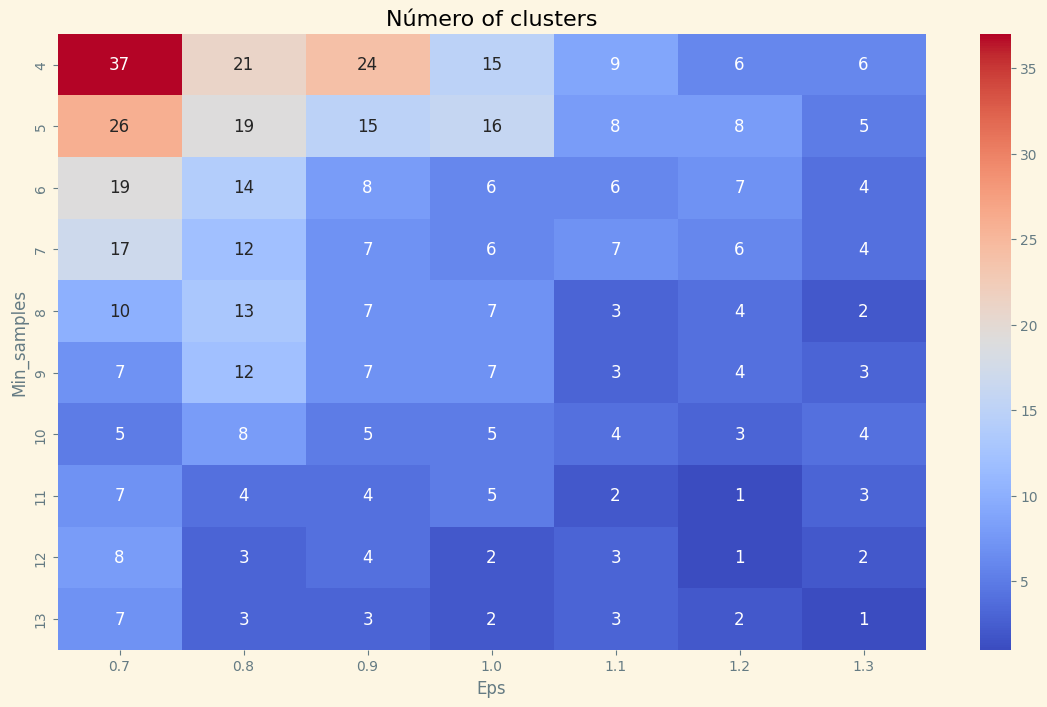

In [ ]:
pivot_clusters = pd.pivot_table(dbscan_configs_df, values="num_clusters", index="Min_samples", columns="Eps")

fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(pivot_clusters, annot=True, annot_kws={"size": 12}, cmap="coolwarm", ax=ax)
ax.set_title("Número of clusters")
plt.show()

El heatmap ilustra la variabilidad en el número de clusters generados por las diferentes combinaciones de `eps` y `min_samples`. El reto radica en identificar una configuración que produzca un número de clusters adecuado para revelar las estructuras subyacentes en los datos, evitando tanto la sobresimplificación con muy pocos clusters como la fragmentación excesiva con demasiados.

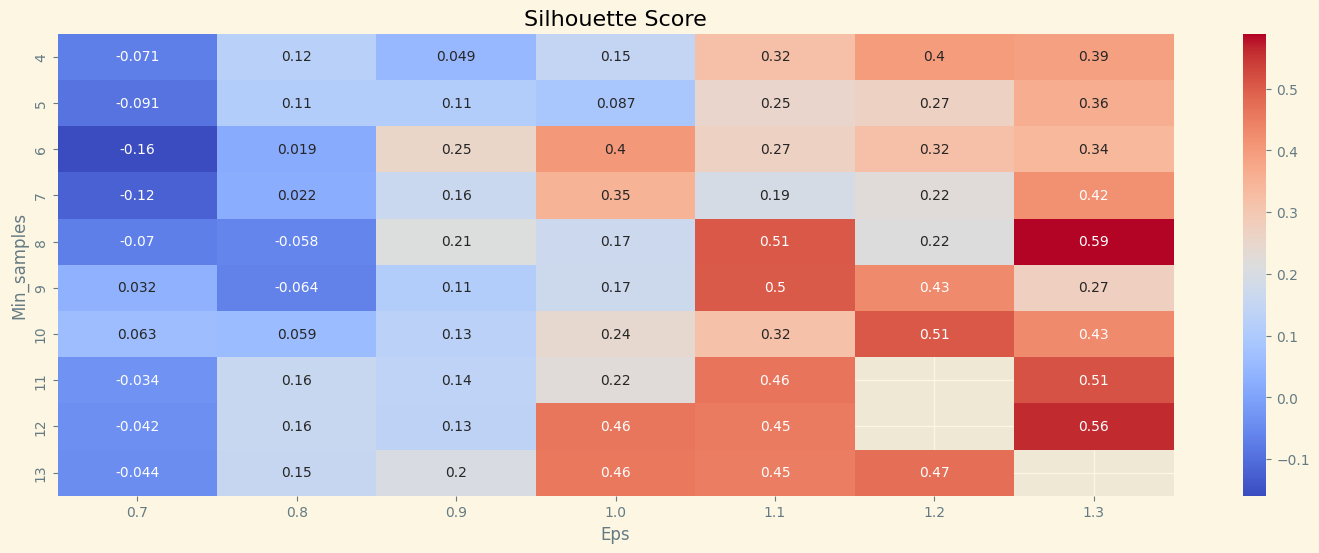

In [ ]:
pivot_score = pd.pivot_table(dbscan_configs_df, values="sil_score", index="Min_samples", columns="Eps")

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_score, annot=True, annot_kws={"size": 10}, cmap="coolwarm", ax=ax)
ax.set_title("Silhouette Score")
plt.show()

Este heatmap muestra el `Silhouette Score` correspondiente a cada configuración de `eps` y `min_samples`. La interpretación de estos valores es crucial para evaluar la calidad del clustering:

* Un valor cercano a 1 indica que los puntos están bien agrupados dentro de sus respectivos clusters.

* Un valor cercano a 0 sugiere que los puntos se encuentran en el límite entre dos clusters.

* Un valor negativo señala que los puntos podrían estar mal agrupados.

El desafío consiste en identificar las configuraciones de eps y min_samples que no solo produzcan un Silhouette Score cercano a 1, sino que también generen un número razonable de clusters, complementando así el análisis del heatmap anterior.

*NOTA: las combinaciones `sin score` corresponden a configuraciones que han generado un único cluster (además del cluster de ruido), por lo que el cálculo del Silhouette Score no fue realizado.*

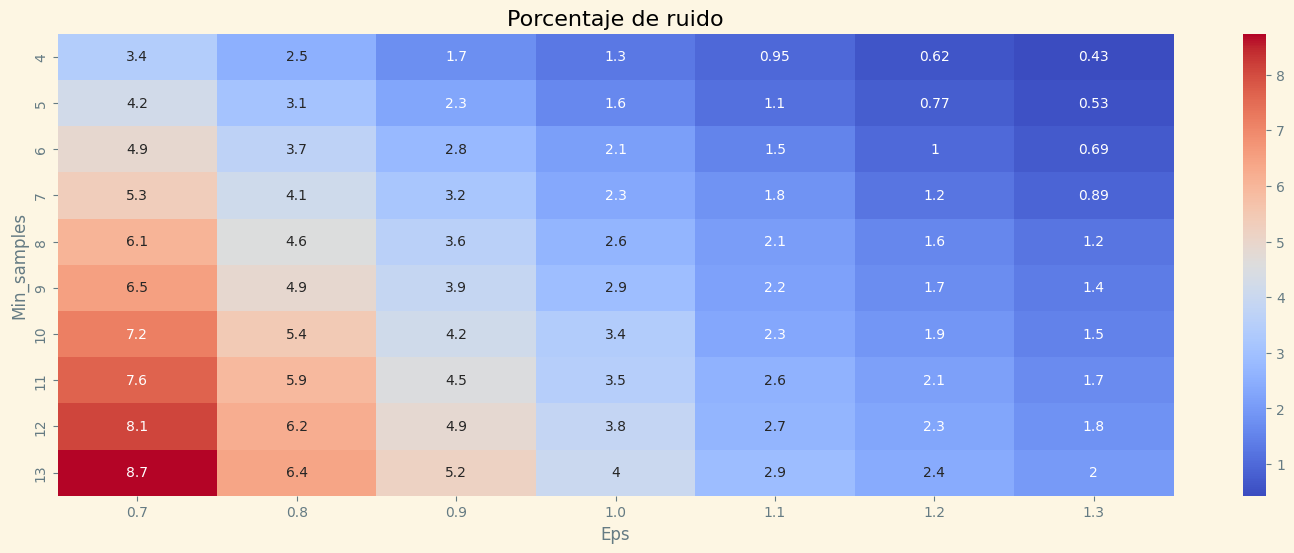

In [ ]:
pivot_noise = pd.pivot_table(dbscan_configs_df, values="perc_noise", index="Min_samples", columns="Eps")

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_noise, annot=True, annot_kws={"size": 10}, cmap="coolwarm", ax=ax)
ax.set_title("Porcentaje de ruido")
plt.show()

Este heatmap muestra el `Porcentaje de ruido` generado por cada configuración de `eps` y `min_samples`. Si bien un cierto nivel de ruido es natural en un clustering saludable, este no debería superar ni eclipsar a los clusters generados.

Los porcentajes de ruido están representados en una escala de 0 a 100.

###### Conclusión de la evaluación gráfica

Para encontrar la intersección de los conjuntos `Número de clusters`, `Silhouette Score` y `Porcentaje de ruido`, hay que identificar los rangos de `min_samples` y `eps` que se solapan en los tres criterios.

**Intersección de min_samples**:

* Número de clusters: 5 a 13.

* Silhouette score: 4 a 13.

* Ruido: 4 a 13, paso de 1.

* Intersección: **5 a 13**.

**Intersección de eps**:

* Número de clusters: 0.7 a 1.2.

* Silhouette score: 0.9 a 1.3.

* Ruido: 0.7 a 1.3.

* Intersección: **0.9 a 1.2**.

**Resultado de la intersección**:

**min_samples: 5 a 13**

**eps: 0.9 a 1.2**

##### Evaluación calculada de mejores combinaciones

Se analizan computacionalmente aquellas configuraciones a fin de determinar la óptima.

###### Determinación del mejor cluster

El clustering óptimo será aquel que cumpla las siguientes condiciones:

* Existen más de 2 clusters (además del cluster de ruido)

* El Silhouette score es superior a 0.3

* La diferencia entre la cantidad de puntos en el cluster principal (Cluster 0) y el siguiente (Cluster 1) es la menor. (Esto se debe a que la distribución de los puntos es muy densa)

In [ ]:
# Calcular el tamaño de los clusters (Cantidad de puntos en cada cluster)

# Almacenar el tamaño de los clusters
cluster_sizes = []

# La columna 'labels' contiene las etiquetas de los clusters para cada configuración
for labels in dbscan_configs_df['labels']:
    # Contar el número de puntos en cada cluster, excluyendo el ruido (-1)
    unique, counts = np.unique(labels, return_counts=True)
    cluster_info = dict(zip(unique, counts))
    
    # Remover el ruido de los clusters
    if -1 in cluster_info:
        del cluster_info[-1]
    
    # Ordenar los tamaños de los clusters en orden descendente
    sorted_cluster_sizes = sorted(cluster_info.values(), reverse=True)
    
    # Agregar los tamaños de los clusters a la lista
    cluster_sizes.append(sorted_cluster_sizes)

# Añadir la columna `cluster_sizes` al DataFrame
dbscan_configs_df['cluster_sizes'] = cluster_sizes
dbscan_configs_df

,Eps,Min_samples,num_clusters,num_noise,perc_noise,sil_score,labels,cluster_sizes
0,0.7,4,37,535,3.429707,-0.070712,"[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0,...","[14775, 61, 15, 15, 14, 14, 11, 10, 9, 8, 7, 7..."
1,0.7,5,26,655,4.198987,-0.091152,"[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0,...","[14699, 36, 23, 23, 14, 11, 11, 11, 10, 10, 9,..."
2,0.7,6,19,762,4.884929,-0.159246,"[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0,...","[14637, 25, 24, 23, 22, 12, 10, 10, 10, 8, 7, ..."
3,0.7,7,17,831,5.327265,-0.122921,"[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0,...","[14603, 24, 23, 17, 11, 10, 10, 9, 8, 7, 7, 7,..."
4,0.7,8,10,944,6.051670,-0.069904,"[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 2, 0, 0,...","[14552, 21, 17, 14, 10, 9, 9, 9, 8, 6]"
...,...,...,...,...,...,...,...,...
65,1.3,9,3,213,1.365472,0.274488,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[15350, 31, 5]"
66,1.3,10,4,232,1.487275,0.430796,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[15337, 17, 8, 5]"
67,1.3,11,3,262,1.679595,0.513404,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[15315, 12, 10]"
68,1.3,12,2,281,1.801398,0.562555,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[15306, 12]"


In [ ]:
# Obtener los clusters filtrados y ordenados

def cluster_size_difference(cluster_sizes):
    if len(cluster_sizes) > 1:  # Asegurarse de que haya al menos dos clusters
        sorted_sizes = sorted(cluster_sizes, reverse=True)
        return sorted_sizes[0], sorted_sizes[1], sorted_sizes[0] - sorted_sizes[1]
    elif len(cluster_sizes) == 1:
        return cluster_sizes[0], 0, cluster_sizes[0]  # Si hay solo un cluster, el segundo es 0 y la diferencia es el tamaño del único cluster
    return 0, 0, 0  # Si no hay clusters válidos, todo es 0


# Aplicar la función para obtener los tamaños de Cluster[0] y Cluster[1] y la diferencia entre ellos
dbscan_configs_df[['Cluster_0', 'Cluster_1', 'Cluster_size_diff']] = dbscan_configs_df['cluster_sizes'].apply(
    lambda x: pd.Series(cluster_size_difference(x))
)

# Filtrar las configuraciones válidas
valid_configs_df = dbscan_configs_df[
    (dbscan_configs_df['num_clusters'] > 2) &
    (dbscan_configs_df['sil_score'] > 0.3)
]

# Ordenar por diferencia de tamaño (ascendente), luego por perc_noise (ascendente), y por sil_score (descendente)
sorted_results_df = valid_configs_df.sort_values(
    by=['Cluster_size_diff', 'perc_noise', 'sil_score'],
    ascending=[True, True, False]
)

# Mostrar las configuraciones válidas con los tamaños de Cluster[0], Cluster[1] y la diferencia
print("Configuraciones válidas:")
print(sorted_results_df[['Eps', 'Min_samples', 'num_clusters', 'perc_noise', 'sil_score', 'Cluster_size_diff']])


Configuraciones válidas:
    Eps  Min_samples  num_clusters  perc_noise  sil_score  Cluster_size_diff
49  1.1           13             3    2.865568   0.450375              15091
48  1.1           12             3    2.660427   0.452391              15113
33  1.0            7             6    2.339894   0.349613              15177
46  1.1           10             4    2.307840   0.317027              15203
32  1.0            6             6    2.115520   0.402147              15228
45  1.1            9             3    2.179627   0.504282              15230
44  1.1            8             3    2.064235   0.505089              15248
56  1.2           10             3    1.897558   0.507156              15274
55  1.2            9             4    1.724470   0.429199              15285
67  1.3           11             3    1.679595   0.513404              15303
66  1.3           10             4    1.487275   0.430796              15320
52  1.2            6             7    1.012885   0.

##### Visualización de configuración óptima

En base a los cálculos realizados en el paso anterior, se visualiza la configuración óptima de `eps` y `min_samples`.

In [ ]:
# Valores optimos de eps y min_samples
eps_optimo = sorted_results_df.iloc[0]['Eps']
min_samples_optimo = sorted_results_df.iloc[0]['Min_samples']

dbs_clustering = DBSCAN(eps=eps_optimo, min_samples=min_samples_optimo).fit(component_df)

dbs_clustered = component_df.copy()
dbs_clustered.loc[:,'Cluster'] = dbs_clustering.labels_ # append labels

In [ ]:
dbscan_cluster_sizes = dbs_clustered.groupby('Cluster').size().to_frame()
dbscan_cluster_sizes.columns = ['DBSCAN_size']
dbscan_cluster_sizes

,DBSCAN_size
Cluster,
-1,447
0,15115
1,24
2,13


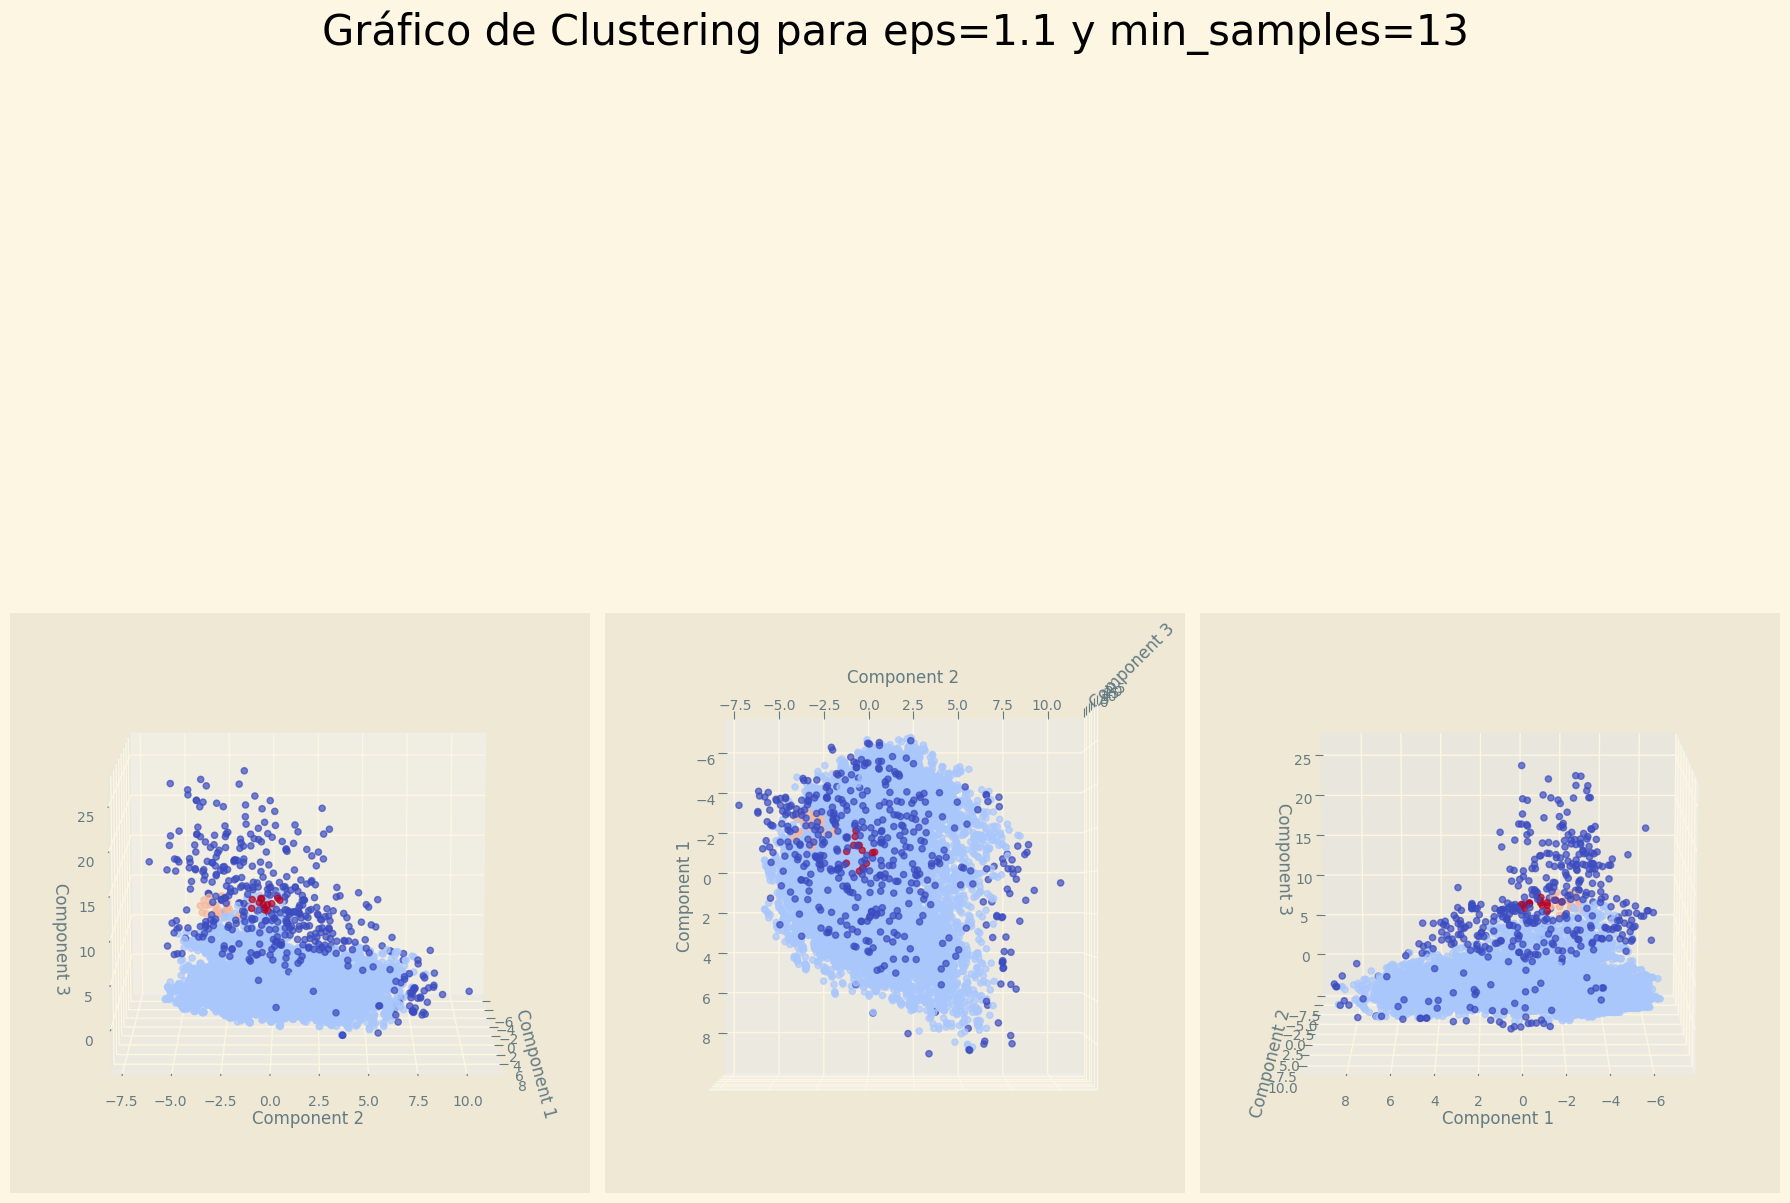

In [ ]:
# Características principales
caract_1 = 'Component 1'
caract_2 = 'Component 2'
caract_3 = 'Component 3'

# Ángulos de visualización
angles = [(10, 0), (90, 0), (10, 90)]  

fig, axes = plt.subplots(1, 3, figsize=(18, 18), subplot_kw={'projection': '3d'})

for j, (elev, azim) in enumerate(angles):
    ax = axes[j]
    scatter = ax.scatter(dbs_clustered[caract_1], dbs_clustered[caract_2], dbs_clustered[caract_3], 
                            c=dbs_clustered['Cluster'], cmap='coolwarm', marker='o', alpha=0.7)
    
    # Configurar los ángulos de visualización
    ax.view_init(elev=elev, azim=azim)
    
    # Etiquetas de los ejes
    ax.set_xlabel(caract_1)
    ax.set_ylabel(caract_2)
    ax.set_zlabel(caract_3)
    
        
fig.suptitle(f'Gráfico de Clustering para eps={eps_optimo} y min_samples={min_samples_optimo}', fontsize=30)
plt.tight_layout()
plt.show()

##### Conclusión

DBSCAN ha sido un desafío para el dataset. La alta densidad de sus datos ha dificultado la determinación de `eps` y `min_values`, los cuales requirieron más de 10 iteraciones y un alto costo de procesamiento.

La configuración óptima de estos valores presenta un puñado de clusters, con una predominancia excesiva del cluster principal (Cluster 0) lo que dificulta significativamente la interpretación y la identificación de las características clave que influyen en este clustering dentro del dataset original. 

Esto sugiere que DBSCAN, aunque efectivo en otros contextos, no es la mejor opción para este tipo de datos, y sería recomendable explorar otros métodos de clustering o enfoques alternativos para obtener resultados más interpretables y útiles.

## Análisis de resultados y conclusiones

Ya obtenidos los clusters y los index de las filas que pertenecen a cada uno de ellos (utilizando el modelo Kmeas), se procede a evaluar las características de los individuos que conforman cada grupo.
Se analizan los grupos en el contexto de las 10 columnas de mayor importancia seleccionadas por el método Permutation Importance, las mismas utilizadas para formar los clusters con Kmeans.
Y luego se visualizan en el espacio tridimensional generado con el método FAMD, para ver su distribución general.

### Los clusters en el dataframe de Principales Columnas de interés

In [184]:
#Se desean los datos sin procesar, o sea, sin estandarizar ni codificar sus valores, para poder interpretarlos de acuerdo a lo que representa cada valor en el estudio
#Pero sí se eliminan los nulos, ya que esos registros se eliminaro antes del clusterin, por lo tanto, no estarán en ningún grupo
#Añadimos al dataframe obtenido una columna llamada 'cluster_label' con los resultados del kmeans para cada fila
kmeans_a_auxm= friesgo_reducida.copy().dropna()
kmeans_a_auxm['cluster_label'] = cluster.labels_
kmeans_a_auxm

,edad,presion_arterial_elevada,consumo_sal,salud_actual,colesterol_alto,peso_autoreportado_kg,dolor_malestar_general,ultima_medicion_glucemia,medido_colesterol,cod_provincia,cluster_label
0,32,1.0,5,3,2,104.0,1,2,1,2,0
7,42,2.0,3,2,1,57.0,1,1,1,2,0
8,32,1.0,4,1,2,82.0,1,3,1,2,0
11,76,1.0,5,3,2,92.0,1,1,1,2,0
13,63,1.0,4,4,2,84.0,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
29216,86,2.0,4,4,2,68.0,1,1,1,94,1
29217,29,2.0,4,2,2,86.0,1,2,1,94,1
29220,62,2.0,4,3,1,90.0,1,2,1,94,1
29221,74,1.0,4,3,1,70.0,1,1,1,94,1


In [185]:
#Puede ser también interesante ver la distribución de la variable 'mantiene_ha_alta' en los grupos, ya que se utilizó su predicción para elegir las columnas con Permutation Importance
friesgo_raw['mantiene_ha_alta']

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
29219    2.0
29220    1.0
29221    1.0
29222    2.0
29223    1.0
Name: mantiene_ha_alta, Length: 29224, dtype: float64

In [186]:
#Se añade la  columna ['mantiene_ha_alta'] al dataframe
kmeans_a_auxm = kmeans_a_auxm.join(friesgo_raw['mantiene_ha_alta'], how='inner')
kmeans_a_auxm

,edad,presion_arterial_elevada,consumo_sal,salud_actual,colesterol_alto,peso_autoreportado_kg,dolor_malestar_general,ultima_medicion_glucemia,medido_colesterol,cod_provincia,cluster_label,mantiene_ha_alta
0,32,1.0,5,3,2,104.0,1,2,1,2,0,2.0
7,42,2.0,3,2,1,57.0,1,1,1,2,0,2.0
8,32,1.0,4,1,2,82.0,1,3,1,2,0,2.0
11,76,1.0,5,3,2,92.0,1,1,1,2,0,2.0
13,63,1.0,4,4,2,84.0,2,1,1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29216,86,2.0,4,4,2,68.0,1,1,1,94,1,2.0
29217,29,2.0,4,2,2,86.0,1,2,1,94,1,2.0
29220,62,2.0,4,3,1,90.0,1,2,1,94,1,1.0
29221,74,1.0,4,3,1,70.0,1,1,1,94,1,1.0


In [292]:
kmeans_a_auxm['cluster_label'].value_counts()

cluster_label
0    8882
1    6717
Name: count, dtype: int64

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


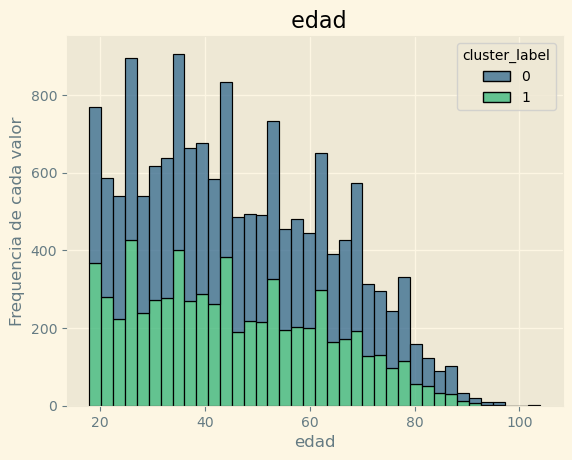

cluster_label  edad
0              18      1.542445
               19      1.418599
               20      1.564963
               21      1.655033
               22      1.778879
                         ...   
1              90      0.104213
               91      0.074438
               92      0.029775
               93      0.014888
               95      0.044663
Name: edad, Length: 157, dtype: float64


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


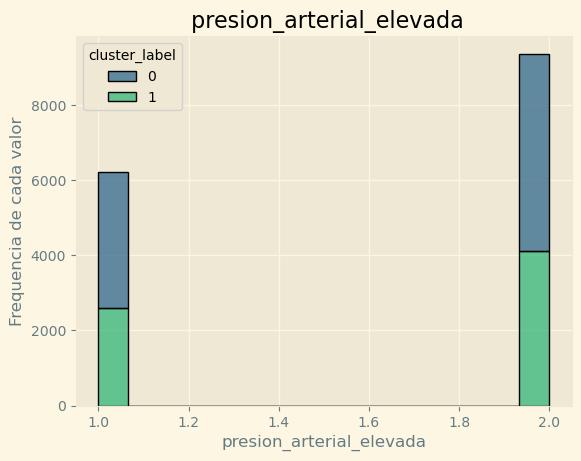

cluster_label  presion_arterial_elevada
0              1.0                         40.745328
               2.0                         59.254672
1              1.0                         38.722644
               2.0                         61.277356
Name: presion_arterial_elevada, dtype: float64


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


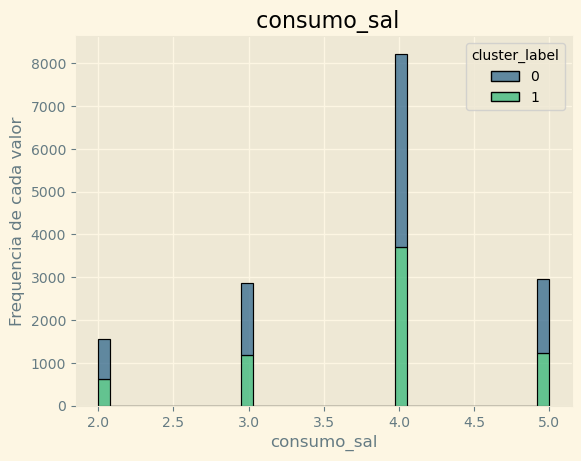

cluster_label  consumo_sal
0              2              10.628237
               3              19.015987
               4              51.002027
               5              19.353749
1              2               9.185648
               3              17.418490
               4              55.024565
               5              18.371297
Name: consumo_sal, dtype: float64


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


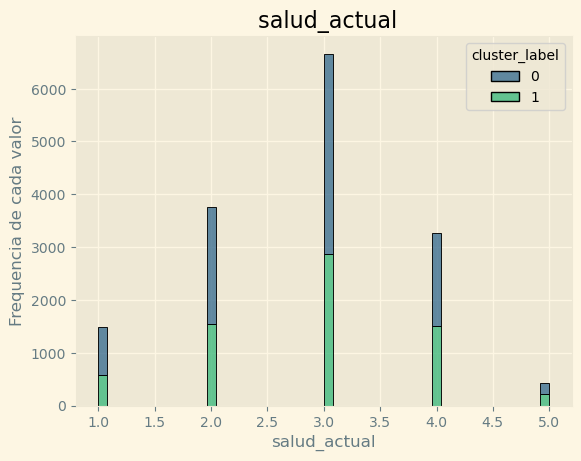

cluster_label  salud_actual
0              1               10.099077
               2               25.016888
               3               42.648052
               4               19.894168
               5                2.341815
1              1                8.679470
               2               22.912014
               3               42.816734
               4               22.301623
               5                3.290159
Name: salud_actual, dtype: float64


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


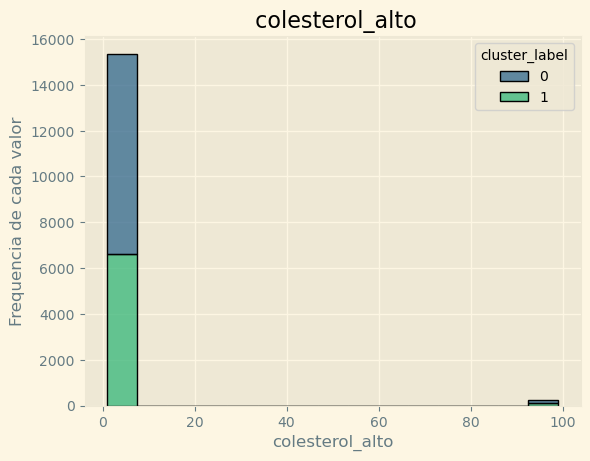

cluster_label  colesterol_alto
0              1                  22.224724
               2                  76.210313
               99                  1.564963
1              1                  22.926902
               2                  75.703439
               99                  1.369659
Name: colesterol_alto, dtype: float64


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


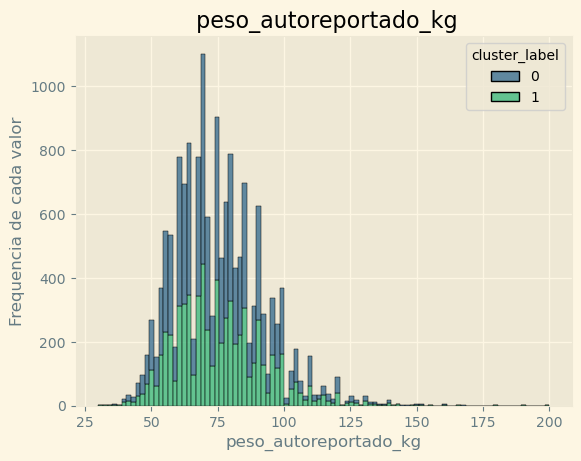

cluster_label  peso_autoreportado_kg
0              33.0                     0.011259
               36.0                     0.022517
               37.0                     0.011259
               39.0                     0.011259
               40.0                     0.112587
                                          ...   
1              160.0                    0.014888
               166.0                    0.014888
               180.0                    0.029775
               190.0                    0.014888
               200.0                    0.014888
Name: peso_autoreportado_kg, Length: 232, dtype: float64


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


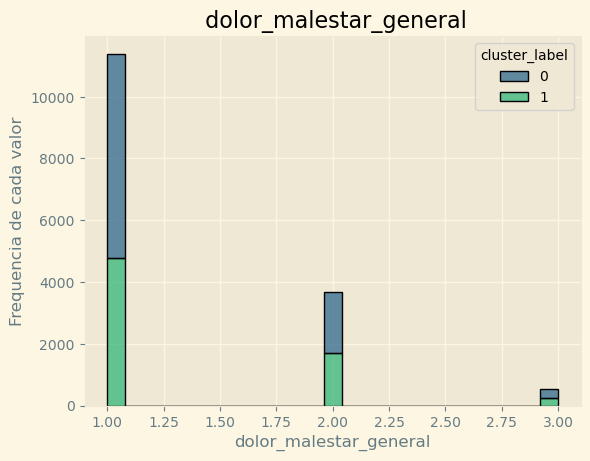

cluster_label  dolor_malestar_general
0              1                         74.712902
               2                         22.089619
               3                          3.197478
1              1                         70.894745
               2                         25.413131
               3                          3.692124
Name: dolor_malestar_general, dtype: float64


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


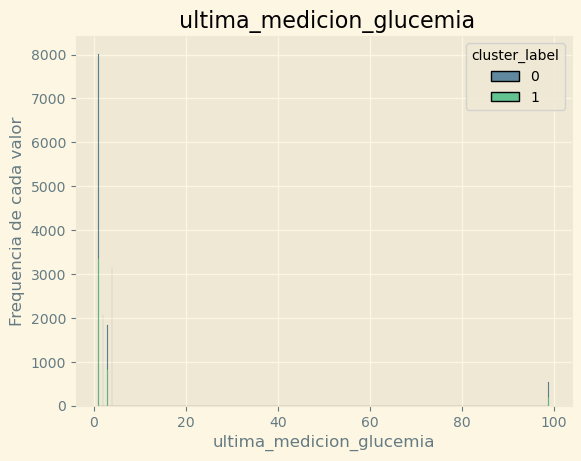

cluster_label  ultima_medicion_glucemia
0              1                           52.454402
               2                           13.037604
               3                           11.427606
               4                           19.455078
               99                           3.625310
1              1                           50.096769
               2                           13.607265
               3                           12.252494
               4                           21.021289
               99                           3.022183
Name: ultima_medicion_glucemia, dtype: float64


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


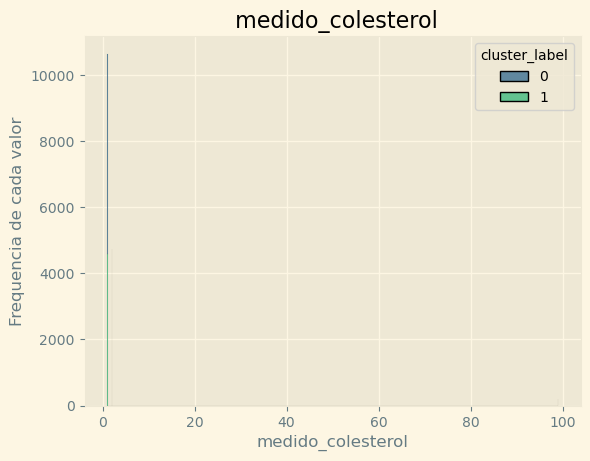

cluster_label  medido_colesterol
0              1                    68.430534
               2                    30.432335
               99                    1.137131
1              1                    68.259640
               2                    30.311151
               99                    1.429209
Name: medido_colesterol, dtype: float64


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


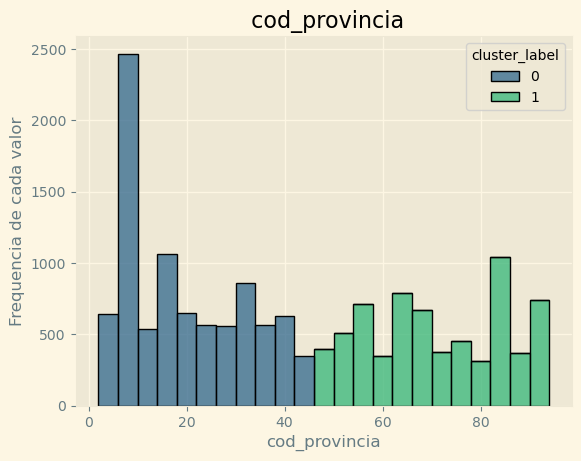

cluster_label  cod_provincia
0              2                 7.239361
               6                27.786535
               10                6.045936
               14               11.990543
               18                7.295654
               22                6.361180
               26                6.271110
               30                9.648728
               34                6.372439
               38                7.081738
               42                3.906778
1              46                5.865714
               50                7.577788
               54               10.570195
               58                5.121334
               62               11.776091
               66               10.004466
               70                5.627512
               74                6.773857
               78                4.689594
               82               15.497990
               86                5.493524
               90                8.277505
     

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


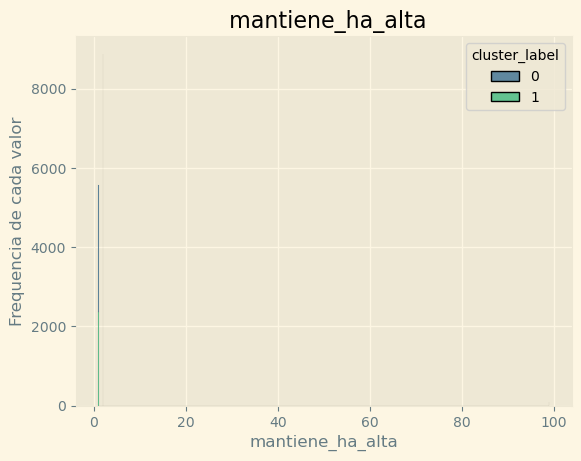

cluster_label  mantiene_ha_alta
0              1.0                 38.830111
               2.0                 60.646966
               99.0                 0.522924
1              1.0                 37.519848
               2.0                 61.860908
               99.0                 0.619244
Name: mantiene_ha_alta, dtype: float64


In [293]:
#Para comparar los grupos se realiza un histograma de cada variable, y se colorea de acuerdo a los clusters.
#Gráficamente se vió que los valores están repartidos de forma pareja en los grupos, pero con una leve mayoría en el cluster 0
#Para poder analizar numéricamente se volvió a la función y se incluyó un cálculo del porcentaje que cada posible valor de la variable representa en cada cluster, respondiendo a:
#¿Cuál es la composición de las columnas en cada cluster? ¿Hay diferencia entre ellos?
for column in kmeans_a_auxm.columns:
    if column == 'cluster_label':  
        continue
    unique_values = kmeans_a_auxm[column].unique()
    sum_of_unique = kmeans_a_auxm.groupby(column)[column].sum()
    
    cluster_counts = kmeans_a_auxm.groupby(['cluster_label',column])[column].count()/kmeans_a_auxm.groupby('cluster_label')[column].count()*100
    


    plt.figure()  
    sns.histplot(data=kmeans_a_auxm, x=column, hue='cluster_label', palette='viridis', multiple='stack')
    plt.title(f' {column}')
    plt.xlabel(column)
    plt.ylabel('Frequencia de cada valor')
    plt.show()
    print(cluster_counts)

Se observa que la composición de ambos cluster es muy similar, compuestas por valores muy similares en sus columnas.
La diferencia se hace notar claramente en la columna cod_provincia, es la característica que divide a los datos en dos clusters.
Los registros cuyo código de provincia es un número bajo (aproximadamente menor a 50) se ubicaron en el grupo 0, y el resto en el grupo 1.
Los resultados no son de interés para nuestro análisis. 
Posiblemente la columna cod_provincia no sea considerada para próximas iteraciones.

### Los clusters en el espacio de los Componentes Principales (dimensionalidad reducida)

#### Visualización de los datos de cada cluster, en el espacio tridimensional obtenido de FAMD

In [129]:
#Partiendo del dataframe generado con las coordenadas de los registros en las componentes principales del FAMD, se añade también la columna 'cluster_label' generada por el modelo Kmeans
kmeans_a_3PC= component_df.copy()
kmeans_a_3PC['cluster_label'] = cluster.labels_
kmeans_a_3PC

,Component 1,Component 2,Component 3,cluster_label
0,2.071236,1.071823,-3.043333,0
7,2.168555,2.750455,-5.210474,0
8,0.183330,1.576956,-3.751151,0
11,3.124489,1.255445,-2.165228,0
13,4.123491,-0.150895,-1.079932,0
...,...,...,...,...
29216,2.109646,2.363097,0.145466,1
29217,-0.170509,3.418448,-2.613855,1
29220,2.296853,2.681981,-1.086059,1
29221,3.925746,2.669813,0.568157,1


In [130]:
#Se añade la columna 'mantiene_ha_alta' 
#En este entorno solo se podrá ver gráficamente la distribución de los grupos
#También se observará la distribución de la variable mantiene_ha_alta, ya que las columnas utilizadas para el FAMD también provienen del Permutation Importance, y es de interés notar visualmente algún patrón 
kmeans_a_3PC=kmeans_a_3PC.join(friesgo_raw['mantiene_ha_alta'], how='inner')
kmeans_a_3PC

,Component 1,Component 2,Component 3,cluster_label,mantiene_ha_alta
0,2.071236,1.071823,-3.043333,0,2.0
7,2.168555,2.750455,-5.210474,0,2.0
8,0.183330,1.576956,-3.751151,0,2.0
11,3.124489,1.255445,-2.165228,0,2.0
13,4.123491,-0.150895,-1.079932,0,1.0
...,...,...,...,...,...
29216,2.109646,2.363097,0.145466,1,2.0
29217,-0.170509,3.418448,-2.613855,1,2.0
29220,2.296853,2.681981,-1.086059,1,1.0
29221,3.925746,2.669813,0.568157,1,1.0


In [136]:
kmeans_a_3PC['mantiene_ha_alta'].value_counts()

mantiene_ha_alta
2.0     8883
1.0     5556
99.0      82
Name: count, dtype: int64

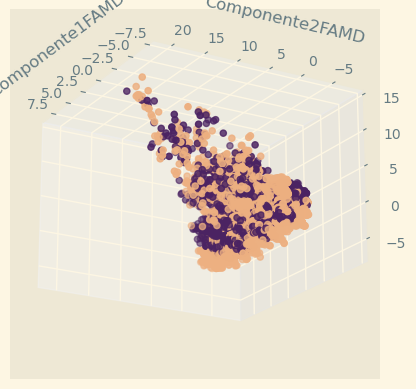

In [320]:
#Gráfico de los datos en los ejes de las componentes principales, coloreadas según grupo
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(kmeans_a_3PC.iloc[:, 0], kmeans_a_3PC.iloc[:, 1], kmeans_a_3PC.iloc[:, 2], c=kmeans_a_3PC['cluster_label'], cmap='flare')

ax.set_xlabel('Componente1FAMD')
ax.set_ylabel('Componente2FAMD')
ax.set_zlabel('Componente3FAMD')
ax.view_init(elev=-20, azim=150)

plt.show()

Gráficamente se comprende la dificultad de los algoritmo DBSCAN(que se entrenó a partir del FAMD) para dividir estos datos: si bien se distinguen pequeños grupos, la densidad de los datos es enorme.
En cuento a los resultados del algoritmo Kmeans, llegan a distinguirse integrantes de ambos grupos, pero no se ven características distintivas en su distribución.

#### Análisis de hipertensión

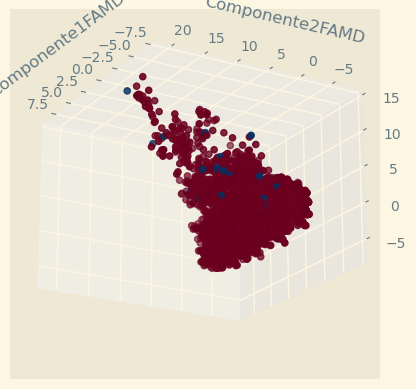

In [328]:
#Gráfico de los datos en los ejes de las componentes principales, coloreadas según valor en 'mantiene_ha_alta'
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(kmeans_a_3PC.iloc[:, 0], kmeans_a_3PC.iloc[:, 1], kmeans_a_3PC.iloc[:, 2], c=kmeans_a_3PC['mantiene_ha_alta'],cmap='RdBu')

ax.set_xlabel('Componente1FAMD')
ax.set_ylabel('Componente2FAMD')
ax.set_zlabel('Componente3FAMD')
ax.view_init(elev=-20, azim=150)

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1764\2813710735.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(kmeans_a_3PC[kmeans_a_3PC['mantiene_ha_alta']==1].iloc[:, 0], kmeans_a_3PC[kmeans_a_3PC['mantiene_ha_alta']==1].iloc[:, 1], kmeans_a_3PC[kmeans_a_3PC['mantiene_ha_alta']==1].iloc[:, 2],


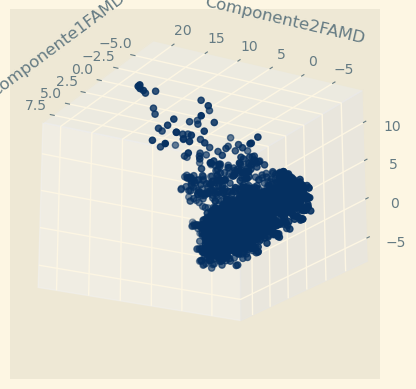

In [309]:
#Debido a la superposición y alta densidad de puntos, se grafican con separado, manteniendo los colores
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(kmeans_a_3PC[kmeans_a_3PC['mantiene_ha_alta']==1].iloc[:, 0], kmeans_a_3PC[kmeans_a_3PC['mantiene_ha_alta']==1].iloc[:, 1], kmeans_a_3PC[kmeans_a_3PC['mantiene_ha_alta']==1].iloc[:, 2],
           c=(0.01960784, 0.18823529, 0.38039216))

ax.set_xlabel('Componente1FAMD')
ax.set_ylabel('Componente2FAMD')
ax.set_zlabel('Componente3FAMD')
ax.view_init(elev=-20, azim=150)

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1764\2857276055.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(kmeans_a_3PC[kmeans_a_3PC['mantiene_ha_alta']==2].iloc[:, 0], kmeans_a_3PC[kmeans_a_3PC['mantiene_ha_alta']==2].iloc[:, 1], kmeans_a_3PC[kmeans_a_3PC['mantiene_ha_alta']==2].iloc[:, 2],


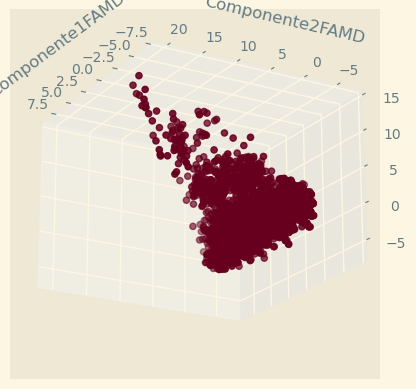

In [308]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(kmeans_a_3PC[kmeans_a_3PC['mantiene_ha_alta']==2].iloc[:, 0], kmeans_a_3PC[kmeans_a_3PC['mantiene_ha_alta']==2].iloc[:, 1], kmeans_a_3PC[kmeans_a_3PC['mantiene_ha_alta']==2].iloc[:, 2],
           c=(0.40392157,0.,0.12156863))

ax.set_xlabel('Componente1FAMD')
ax.set_ylabel('Componente2FAMD')
ax.set_zlabel('Componente3FAMD')
ax.view_init(elev=-20, azim=150)

plt.show()

En los ejes de las Componentes Principales tampoco se nota una distribución característica para los valores de 'mantiene_ha_alta'

In [166]:
#En un último intento se analiza cuantitativamente la relación entre 'cluster_label' y 'mantiene_ha_alta'
#Se divide el dataframe anterio en dos subset, cada uno conteniendo uno de los grupos
subset_cluster_0_3PC= kmeans_a_3PC[kmeans_a_3PC['cluster_label']==0]
subset_cluster_1_3PC= kmeans_a_3PC[kmeans_a_3PC['cluster_label']==1]

In [311]:
subset_cluster_0_3PC['mantiene_ha_alta'].value_counts()/subset_cluster_0_3PC['mantiene_ha_alta'].count()*100

mantiene_ha_alta
2.0     60.646966
1.0     38.830111
99.0     0.522924
Name: count, dtype: float64

In [312]:
subset_cluster_1_3PC['mantiene_ha_alta'].value_counts()/subset_cluster_1_3PC['mantiene_ha_alta'].count()*100

mantiene_ha_alta
2.0     61.860908
1.0     37.519848
99.0     0.619244
Name: count, dtype: float64

In [172]:
subset_cluster_1_3PC

,Component 1,Component 2,Component 3,cluster_label,mantiene_ha_alta
11161,-3.931320,-0.698439,-1.464006,1,NaN
11164,-0.063158,1.163626,-3.283286,1,1.0
11168,-4.003641,-0.941649,0.342056,1,2.0
11169,-2.206116,-1.027224,0.260620,1,2.0
11171,0.331422,0.405502,-1.930275,1,2.0
...,...,...,...,...,...
29216,2.109646,2.363097,0.145466,1,2.0
29217,-0.170509,3.418448,-2.613855,1,2.0
29220,2.296853,2.681981,-1.086059,1,1.0
29221,3.925746,2.669813,0.568157,1,1.0


In [173]:
subset_cluster_0_3PC

,Component 1,Component 2,Component 3,cluster_label,mantiene_ha_alta
0,2.071236,1.071823,-3.043333,0,2.0
7,2.168555,2.750455,-5.210474,0,2.0
8,0.183330,1.576956,-3.751151,0,2.0
11,3.124489,1.255445,-2.165228,0,2.0
13,4.123491,-0.150895,-1.079932,0,1.0
...,...,...,...,...,...
26150,-0.125603,0.920167,-1.645223,0,2.0
26151,-0.334545,1.507442,-2.566991,0,2.0
26154,-1.222852,-1.288053,3.202126,0,2.0
26156,-2.204085,0.059403,-0.372471,0,2.0


#### Análisis de posible clusterización de los índices

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


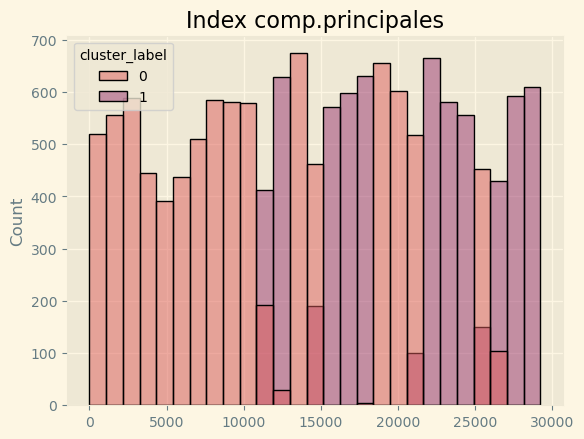

In [322]:
#Llama la atención los valores de los índices en cada grupo, el grupo 1 comienza con valores de 11000 y el cluster cero comienza con valores de un solo dígito 
#Se investiga la razón, analizando si la columna Index pudo haber afectado algún paso

sns.histplot(data=kmeans_a_3PC, x=kmeans_a_3PC.index, hue='cluster_label', palette='flare')
plt.title('Index comp.principales')
plt.show()

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


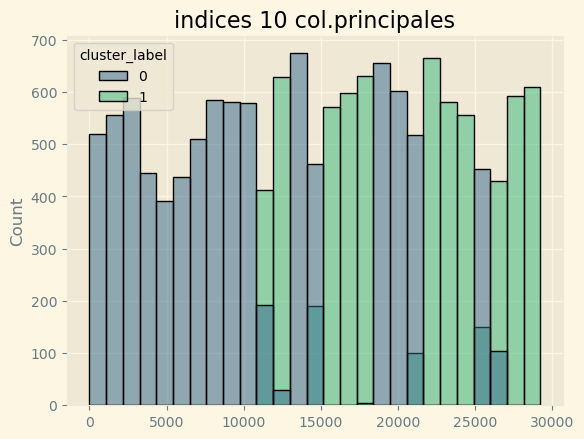

In [323]:
#Corroboramos con la distribución de índices y clusters en el dataframe utilizado en el análisis anterior, en base a las 10 columnas 
sns.histplot(data=kmeans_a_auxm, x=kmeans_a_auxm.index, hue='cluster_label', palette='viridis')
plt.title('indices 10 col.principales')
plt.show()

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


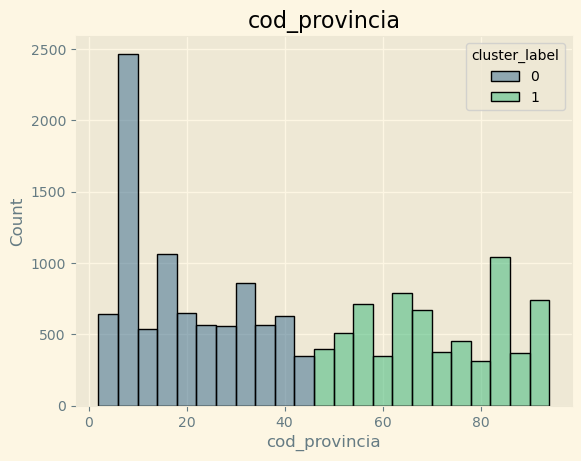

In [324]:
#Se ve una tendencia en los valores de los índices y los clusters, similar a la división de los valores cod_provincia analizados previamente
#El fenómeno podría deberse a una relación entre ambos 
sns.histplot(data=kmeans_a_auxm, x='cod_provincia'
             , hue='cluster_label', palette='viridis')
plt.title('cod_provincia')
plt.show()

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


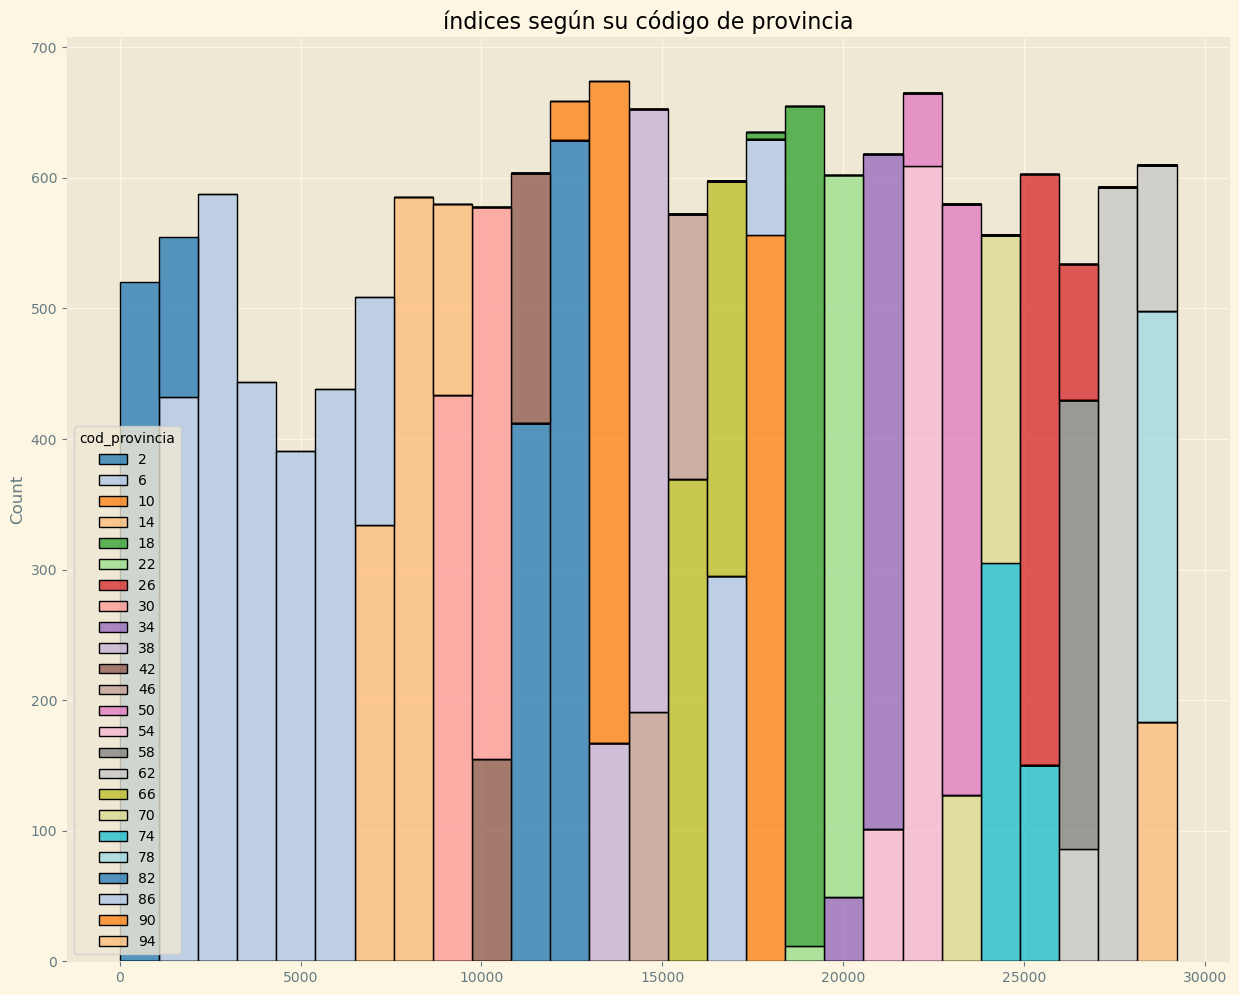

In [325]:
#Se grafica nuevamente un histograma de los índices, pero esta vez coloreados de acuerdo al valor de 'cod_provincia' que le corresponde a cada dato
plt.figure(figsize=(15, 12))
sns.histplot(data=kmeans_a_auxm, x=kmeans_a_auxm.index, hue='cod_provincia', palette='tab20', multiple='stack')
plt.title('índices según su código de provincia')
plt.show()

Se entiende la razón de la distribución de índices en los clusters: si bien no están ordenados en forma ordinal, los registros con igual cod_provincia recibieron números de índices consecutivos. Es la forma en que se ordenaron los datos al ser digitalizados. Posiblemente el orden de códigos de provincia que vamos coincida con un orden alfabético o algún otro.
Se descarta que la columna Index haya pasado a algun modelo, cómo había ocurrido en una instancia de Aprendizaje Supervisado.


### Conclusiones

Se aplicaron varias técnicas de Preprocesamiento de datos (eliminaición de nulos, outliers, codificación y estandarización), luego una evaluación de las columnas para seleccionar las más importantes (Random Forest y Permutation Importance) y finalmente dos técnicas de reducción de dimensionalidad (PCA y FAMD), para preparar los datos a utilizar en los algoritmos de clustering con Aprendizaje No Supervisado.
En cada iteración de este proceso, se fueron logrando mejoras en los resultados:
K-means dio sus mejores resultados utilizando las columnas seleccionadas mediante Permutation Importance.
En cambio, DBSCAN mejoró notablemente luego de la implementación de FAMD (PCA no dio buenos resultados al utilizarse como entrada a los algoritmos de clustering, aunque su métrica propia era buena).

Finalmente aunque DBSCAN logró dar un número de clusters razonable para nuestro objetivo, los mismos estaban extremadamente desbalanceados o traían mucho ruido, fue Kmeans el algoritmo que funcionó mejor con nustros datos, dando dos Clusters claros.

Pero al analizar los clusters obtenidos se encontró que la información que nos proporcionaba no era relevante para nuestro objetivo general: identificar tendencias entre características del individuo y su estilo de vida, y las enfermedades crónicas. 
Se tendrá en cuenta para una próxima iteración la influencia que la variable 'cod_provincia' tuvo en el clustering Kmeans, por eso se espera poder mejorar los resultados.
